**IDS MODEL VERSION 12**

*This model aims to predict Agric value as a function of baseline characteristics and inputs*

*Import librarries*

In [2]:
import pandas as pd # type: ignore
import numpy as np # type: ignore


*Load the IDS dataset*

In [3]:
# Specify the file path
# file_path = r"C:\Reaemanz\Raising the village\IDS\IDS repo\IDS_22_21_20_v1.csv"
# file_path = r"C:\Reaemanz\Raising the village\IDS\Model_changes\Model_7\IDS_22_21_20_v1.csv"

# Load the CSV file into a Pandas DataFrame
IDS_raw = pd.read_csv('datasets/IDS_22_21_20_v2.csv')

# print the data set

IDS_raw.head(5)

,pre_village,hhs,total_population,beans_kgs_hh_seed,ground_nuts_kgs_hh_seed,maize_kgs_hh_seed,rice_kgs_hh_seed,onions_bags_hh_seed,soya_bean_kgs_hh_seed,field_peas_kgs_hh_seed,...,Sorghum_total_yield,Maize_total_yield,Millet_total_yield,Onions_total_yield,Sweet_potatoes_total_yield,Ground_Nuts_total_yield,Food_banana_total_yield,Coffee_total_yield,cohort,Agriculture Value (USD)
0,Bikungu,103.0,543.0,2.056338,2.056338,0.000000,0.0,0.0,2.056338,0.0,...,NaN,NaN,NaN,NaN,NaN,44.25,82.500000,48.000000,2022.0,780.359556
1,Bisiika_A,75.0,361.0,3.028037,3.028037,3.028037,0.0,0.0,0.000000,0.0,...,NaN,NaN,NaN,NaN,10.777778,NaN,96.818182,66.363636,2022.0,784.397180
2,Bisiika_B,70.0,339.0,3.030303,3.030303,3.030303,0.0,0.0,0.000000,0.0,...,NaN,NaN,NaN,NaN,10.000000,NaN,79.000000,70.500000,2022.0,729.391892
3,Bubalala,55.0,259.0,2.571429,2.571429,2.571429,0.0,0.0,2.571429,0.0,...,NaN,456.923077,144.0,NaN,6.500000,NaN,3.000000,NaN,2022.0,528.932432
4,Budongo,90.0,424.0,2.523810,2.523810,2.523810,0.0,0.0,2.523810,0.0,...,NaN,425.750000,192.5,NaN,4.000000,NaN,12.750000,45.000000,2022.0,408.060197


*Drop Columns*

In [4]:
# Assuming IDS_raw is your DataFrame
columns_to_remove = [
    'hhs',
    "secateurs_tools", "gloves_tools", "Onions_total_yield",
    "hot_pepper_tins_organic_pesticides", "derris_tin_organic_pesticides",
    "onions_bags_organic_pesticides", "turplins_tools", "cohort", 'pre_village',
    'rice_kgs_hh_seed', 'field_peas_kgs_hh_seed', 'neem_kg_organic_pesticides', 'tephrosia_kgs_organic_pesticides',
    'forked_spades_tools','jerrican_tools', 'turplins_tools', 'sisal_rope_liquid_manure', 'derris_tin_organic_pesticides',
    'sweet_potatoes_bags_hh_seed', 'millet_kgs_hh_seed', 'onions_bags_hh_seed'
]

# Drop the specified columns
IDS_1 = IDS_raw.drop(columns=columns_to_remove, errors='ignore')

# Display the cleaned dataset
IDS_1.head(2)

,total_population,beans_kgs_hh_seed,ground_nuts_kgs_hh_seed,maize_kgs_hh_seed,soya_bean_kgs_hh_seed,irish_potatoes_bags_hh_seed,garlic_kgs_organic_pesticides,ginger_kgs_organic_pesticides,plastic_tanks_120_ltrs_liquid_manure,sacks_liquid_manure,...,Irish_potatoes_total_yield,Cassava_total_yield,Sorghum_total_yield,Maize_total_yield,Millet_total_yield,Sweet_potatoes_total_yield,Ground_Nuts_total_yield,Food_banana_total_yield,Coffee_total_yield,Agriculture Value (USD)
0,543.0,2.056338,2.056338,0.000000,2.056338,NaN,0.244131,0.244131,0.037559,0.075117,...,NaN,NaN,NaN,NaN,NaN,NaN,44.25,82.500000,48.000000,780.359556
1,361.0,3.028037,3.028037,3.028037,0.000000,NaN,0.355140,0.355140,0.037383,0.037383,...,NaN,NaN,NaN,NaN,NaN,10.777778,NaN,96.818182,66.363636,784.397180


In [5]:
IDS_2 = IDS_1.copy()
# List of columns to remove
columns_to_remove_2 = [
    "rice_kgs_hh_seed", "onions_bags_hh_seed", "field_peas_kgs_hh_seed",
    "irish_potatoes_bags_hh_seed", "millet_kgs_hh_seed", "sweet_potatoes_bags_hh_seed",
    "neem_kg_organic_pesticides", "tephrosia_kgs_organic_pesticides", "filter_liquid_manure",
    "mortar_&_pestle_liquid_manure", "forked_spades_tools", "jerrican_tools",
    "Irish_potatoes_total_yield", "Sorghum_total_yield", "Millet_total_yield",
    "Ground_Nuts_total_yield", 'hhh_age', 'total_population'
]

# Remove columns
IDS_3 = IDS_2.drop(columns=columns_to_remove_2, errors='ignore')

IDS_3.head()

,beans_kgs_hh_seed,ground_nuts_kgs_hh_seed,maize_kgs_hh_seed,soya_bean_kgs_hh_seed,garlic_kgs_organic_pesticides,ginger_kgs_organic_pesticides,plastic_tanks_120_ltrs_liquid_manure,sacks_liquid_manure,hoes_tools,spades_tools,...,GPS-Altitude,Land_size_agriculture,Time_to_collect_Water_for_Household_use_Minutes,Beans_total_yield,Cassava_total_yield,Maize_total_yield,Sweet_potatoes_total_yield,Food_banana_total_yield,Coffee_total_yield,Agriculture Value (USD)
0,2.056338,2.056338,0.000000,2.056338,0.244131,0.244131,0.037559,0.075117,0.033803,0.022535,...,566.658333,0.545833,67.500000,83.111111,NaN,NaN,NaN,82.500000,48.000000,780.359556
1,3.028037,3.028037,3.028037,0.000000,0.355140,0.355140,0.037383,0.037383,0.056075,0.037383,...,1778.975000,1.408333,23.333333,75.333333,NaN,NaN,10.777778,96.818182,66.363636,784.397180
2,3.030303,3.030303,3.030303,0.000000,0.363636,0.363636,0.040404,0.040404,0.060606,0.040404,...,1710.150000,0.922917,40.000000,85.700000,NaN,NaN,10.000000,79.000000,70.500000,729.391892
3,2.571429,2.571429,2.571429,2.571429,0.363636,0.363636,0.103896,0.207792,0.051948,0.051948,...,1024.804167,1.322222,62.166667,33.000000,NaN,456.923077,6.500000,3.000000,NaN,528.932432
4,2.523810,2.523810,2.523810,2.523810,0.365079,0.365079,0.063492,0.126984,0.031746,0.031746,...,1035.525000,1.282895,40.291667,24.500000,37.0,425.750000,4.000000,12.750000,45.000000,408.060197


**MISSING DATA**

*Rows with Missing data*

In [6]:
# Count rows with more than 20% missing data
threshold = len(IDS_3.columns) * 0.15
rows_with_missing_data = IDS_3.isnull().sum(axis=1) > threshold
count_rows_with_missing_data = rows_with_missing_data.sum()

print(count_rows_with_missing_data)

23


*Delete Rows with 20% Missing data*

In [7]:
# Delete rows with more than 20% missing data

IDS_4 = IDS_3.copy()
IDS_5 = IDS_4.dropna(thresh=threshold, axis=0)

# Display the cleaned DataFrame 
IDS_5.head(8)

,beans_kgs_hh_seed,ground_nuts_kgs_hh_seed,maize_kgs_hh_seed,soya_bean_kgs_hh_seed,garlic_kgs_organic_pesticides,ginger_kgs_organic_pesticides,plastic_tanks_120_ltrs_liquid_manure,sacks_liquid_manure,hoes_tools,spades_tools,...,GPS-Altitude,Land_size_agriculture,Time_to_collect_Water_for_Household_use_Minutes,Beans_total_yield,Cassava_total_yield,Maize_total_yield,Sweet_potatoes_total_yield,Food_banana_total_yield,Coffee_total_yield,Agriculture Value (USD)
0,2.056338,2.056338,0.000000,2.056338,0.244131,0.244131,0.037559,0.075117,0.033803,0.022535,...,566.658333,0.545833,67.500000,83.111111,NaN,NaN,NaN,82.500000,48.000000,780.359556
1,3.028037,3.028037,3.028037,0.000000,0.355140,0.355140,0.037383,0.037383,0.056075,0.037383,...,1778.975000,1.408333,23.333333,75.333333,NaN,NaN,10.777778,96.818182,66.363636,784.397180
2,3.030303,3.030303,3.030303,0.000000,0.363636,0.363636,0.040404,0.040404,0.060606,0.040404,...,1710.150000,0.922917,40.000000,85.700000,NaN,NaN,10.000000,79.000000,70.500000,729.391892
3,2.571429,2.571429,2.571429,2.571429,0.363636,0.363636,0.103896,0.207792,0.051948,0.051948,...,1024.804167,1.322222,62.166667,33.000000,NaN,456.923077,6.500000,3.000000,NaN,528.932432
4,2.523810,2.523810,2.523810,2.523810,0.365079,0.365079,0.063492,0.126984,0.031746,0.031746,...,1035.525000,1.282895,40.291667,24.500000,37.0,425.750000,4.000000,12.750000,45.000000,408.060197
5,3.020690,0.000000,3.020690,0.000000,0.358621,0.358621,0.055172,0.110345,0.068966,0.068966,...,2238.450000,0.520833,64.166667,131.416667,NaN,NaN,4.687500,16.500000,22.000000,784.359667
6,3.240000,0.000000,3.240000,0.000000,0.360000,0.360000,0.080000,0.320000,0.040000,0.040000,...,2037.733333,1.285833,31.000000,151.666667,NaN,NaN,4.458333,12.750000,NaN,743.902027
7,3.056604,0.000000,3.056604,0.000000,0.339623,0.339623,0.150943,0.301887,0.037736,0.037736,...,2034.925000,1.606250,40.000000,189.000000,NaN,NaN,10.333333,20.000000,NaN,559.060413


*Impute Missing Values for Agric Value*

In [8]:
IDS_6 = IDS_5.copy()

from sklearn.impute import KNNImputer

# Select the 'Agriculture Value (USD)' column
agriculture_value_column = IDS_6[['Agriculture Value (USD)']]

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=4)

# Apply the imputer to the 'Agriculture Value (USD)' column
agriculture_value_imputed = knn_imputer.fit_transform(agriculture_value_column)

# Replace the original column with the imputed values
IDS_6['Agriculture Value (USD)'] = agriculture_value_imputed

# Display the DataFrame to verify the changes
IDS_6.head()

,beans_kgs_hh_seed,ground_nuts_kgs_hh_seed,maize_kgs_hh_seed,soya_bean_kgs_hh_seed,garlic_kgs_organic_pesticides,ginger_kgs_organic_pesticides,plastic_tanks_120_ltrs_liquid_manure,sacks_liquid_manure,hoes_tools,spades_tools,...,GPS-Altitude,Land_size_agriculture,Time_to_collect_Water_for_Household_use_Minutes,Beans_total_yield,Cassava_total_yield,Maize_total_yield,Sweet_potatoes_total_yield,Food_banana_total_yield,Coffee_total_yield,Agriculture Value (USD)
0,2.056338,2.056338,0.000000,2.056338,0.244131,0.244131,0.037559,0.075117,0.033803,0.022535,...,566.658333,0.545833,67.500000,83.111111,NaN,NaN,NaN,82.500000,48.000000,780.359556
1,3.028037,3.028037,3.028037,0.000000,0.355140,0.355140,0.037383,0.037383,0.056075,0.037383,...,1778.975000,1.408333,23.333333,75.333333,NaN,NaN,10.777778,96.818182,66.363636,784.397180
2,3.030303,3.030303,3.030303,0.000000,0.363636,0.363636,0.040404,0.040404,0.060606,0.040404,...,1710.150000,0.922917,40.000000,85.700000,NaN,NaN,10.000000,79.000000,70.500000,729.391892
3,2.571429,2.571429,2.571429,2.571429,0.363636,0.363636,0.103896,0.207792,0.051948,0.051948,...,1024.804167,1.322222,62.166667,33.000000,NaN,456.923077,6.500000,3.000000,NaN,528.932432
4,2.523810,2.523810,2.523810,2.523810,0.365079,0.365079,0.063492,0.126984,0.031746,0.031746,...,1035.525000,1.282895,40.291667,24.500000,37.0,425.750000,4.000000,12.750000,45.000000,408.060197


*Check for Null Missing Values in Agric Value*

In [9]:
# Check for null values
print("Null values in 'Agriculture Value (USD)':")
print(IDS_6['Agriculture Value (USD)'].isnull().sum())

# Check for zero values
print("\nZero values in 'Agriculture Value (USD)':")
print((IDS_6['Agriculture Value (USD)'] == 0).sum())

Null values in 'Agriculture Value (USD)':
0

Zero values in 'Agriculture Value (USD)':
0


*Replace Missing Values with zero's for the Independent features*

In [10]:

IDS_7 = IDS_6.copy()

# Replace all missing values with zero
IDS_7.fillna(0, inplace=True)

# Display the DataFrame to verify the changes
IDS_7.head()

,beans_kgs_hh_seed,ground_nuts_kgs_hh_seed,maize_kgs_hh_seed,soya_bean_kgs_hh_seed,garlic_kgs_organic_pesticides,ginger_kgs_organic_pesticides,plastic_tanks_120_ltrs_liquid_manure,sacks_liquid_manure,hoes_tools,spades_tools,...,GPS-Altitude,Land_size_agriculture,Time_to_collect_Water_for_Household_use_Minutes,Beans_total_yield,Cassava_total_yield,Maize_total_yield,Sweet_potatoes_total_yield,Food_banana_total_yield,Coffee_total_yield,Agriculture Value (USD)
0,2.056338,2.056338,0.000000,2.056338,0.244131,0.244131,0.037559,0.075117,0.033803,0.022535,...,566.658333,0.545833,67.500000,83.111111,0.0,0.000000,0.000000,82.500000,48.000000,780.359556
1,3.028037,3.028037,3.028037,0.000000,0.355140,0.355140,0.037383,0.037383,0.056075,0.037383,...,1778.975000,1.408333,23.333333,75.333333,0.0,0.000000,10.777778,96.818182,66.363636,784.397180
2,3.030303,3.030303,3.030303,0.000000,0.363636,0.363636,0.040404,0.040404,0.060606,0.040404,...,1710.150000,0.922917,40.000000,85.700000,0.0,0.000000,10.000000,79.000000,70.500000,729.391892
3,2.571429,2.571429,2.571429,2.571429,0.363636,0.363636,0.103896,0.207792,0.051948,0.051948,...,1024.804167,1.322222,62.166667,33.000000,0.0,456.923077,6.500000,3.000000,0.000000,528.932432
4,2.523810,2.523810,2.523810,2.523810,0.365079,0.365079,0.063492,0.126984,0.031746,0.031746,...,1035.525000,1.282895,40.291667,24.500000,37.0,425.750000,4.000000,12.750000,45.000000,408.060197


*Confrim Missingness*

In [11]:
# Check for missing values in IDS_2
missing_values_count = IDS_7.isnull().sum().sum()

# Print the result
print(f"Total number of missing values in IDS_2: {missing_values_count}")

Total number of missing values in IDS_2: 0


**HANDLE OUTLIERS**

*Remove the lower bound 1% and upper bound 4%*

In [12]:
import numpy as np
import pandas as pd

# Function to remove outliers for specific numerical columns using percentile-based filtering
def remove_outliers_percentile(dataframe, columns):
    new_df = dataframe.copy()
    
    for column in columns:
        if column in dataframe.select_dtypes(include=['number']).columns:  # Ensure column is numeric
            temp_df = new_df.sort_values(by=column)  # Sort values in ascending order
            temp_df.loc[:, 'index'] = range(1, len(temp_df) + 1)  # Create an index column
            
            low = round(len(temp_df) * 0.01)  # 1% lower bound
            upp = len(temp_df) - round(len(temp_df) * 0.04)  # 4% upper bound
            
            # Create an outlier flag (1 = keep, 0 = remove)
            temp_df['outl'] = np.where((temp_df['index'] > low) & (temp_df['index'] <= upp), 1, 0)
            
            # Keep only non-outliers
            temp_df = temp_df[temp_df['outl'] == 1].drop(columns=['index', 'outl'])  # Drop helper columns
            new_df = temp_df
        else:
            print(f"Warning: Column '{column}' is not numeric and was skipped.")
    
    return new_df

# Specify columns to apply outlier removal
columns_to_clean = ['beans_kgs_hh_seed', 'irish_potatoes_bags_hh_seed','Coffee_total_yield']  # Replace with actual column names

# Apply function to dataset
IDS_8 = remove_outliers_percentile(IDS_7, columns_to_clean)

# Display shape before and after
print(f"Original shape: {IDS_7.shape}")
print(f"Cleaned shape: {IDS_8.shape}")

# # Preview cleaned data
# print(cleaned_IDS_4.head())

# Optional: Save cleaned dataset
# cleaned_IDS_4.to_csv("cleaned_IDS_4.csv", index=False)



Original shape: (464, 27)
Cleaned shape: (418, 27)


*Print Outliers*

In [13]:
# Function to count outliers per column using IQR
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

# Apply to numerical columns
outlier_counts = IDS_8.select_dtypes(include=['number']).apply(count_outliers_iqr)
print("Outlier counts per column:\n", outlier_counts)


Outlier counts per column:
 beans_kgs_hh_seed                                  31
ground_nuts_kgs_hh_seed                             0
maize_kgs_hh_seed                                   0
soya_bean_kgs_hh_seed                               0
garlic_kgs_organic_pesticides                       0
ginger_kgs_organic_pesticides                       0
plastic_tanks_120_ltrs_liquid_manure               14
sacks_liquid_manure                                32
hoes_tools                                          9
spades_tools                                       13
pick_axes_tools                                    12
forked_hoes_tools                                   2
pangas_tools                                        1
wheelbarrows_tools                                 12
trowels_tools                                      31
watering_cans_tools                                15
spray_pumps_tools                                   8
GPS-Altitude                                        0


**CHECK FOR KEWNESS**

In [14]:
# Check skewness of each column
skewness = IDS_8.skew()

# Separate highly skewed & normal features
skewed_features = skewness[abs(skewness) > 1].index  # Skewness > 1 is considered highly skewed
normal_features = skewness[abs(skewness) <= 1].index  # Normally distributed or slightly skewed

print(f"Skewed Features: {len(skewed_features)} variables")
print(f"Normal Features: {len(normal_features)} variables")
skewed_features.to_list()  # print skewed feature


Skewed Features: 17 variables
Normal Features: 10 variables


['beans_kgs_hh_seed',
 'soya_bean_kgs_hh_seed',
 'plastic_tanks_120_ltrs_liquid_manure',
 'sacks_liquid_manure',
 'hoes_tools',
 'pick_axes_tools',
 'trowels_tools',
 'watering_cans_tools',
 'spray_pumps_tools',
 'Land_size_agriculture',
 'Time_to_collect_Water_for_Household_use_Minutes',
 'Beans_total_yield',
 'Cassava_total_yield',
 'Maize_total_yield',
 'Sweet_potatoes_total_yield',
 'Food_banana_total_yield',
 'Coffee_total_yield']

**COMPUTE CORRELATIONS**

In [15]:
# Compute correlation of all features with 'Agriculture Value (USD)'
target_corr = IDS_8.corr()[['Agriculture Value (USD)']].sort_values(by='Agriculture Value (USD)', ascending=False)

# Reset index to have a column for variables
target_corr.reset_index(inplace=True)
target_corr.columns = ['Variable', 'Correlations']

# Display the correlation values
print(target_corr)

# Save the correlation values to an Excel file
correlations = 'datasets/target_corr.xlsx'
target_corr.to_excel(correlations, index=False)


                                           Variable  Correlations
0                           Agriculture Value (USD)      1.000000
1                                 Beans_total_yield      0.264869
2                           Food_banana_total_yield      0.254905
3                     ginger_kgs_organic_pesticides      0.232474
4                     garlic_kgs_organic_pesticides      0.232329
5                                 maize_kgs_hh_seed      0.196478
6                                 spray_pumps_tools      0.184830
7                                     trowels_tools      0.174463
8                                Coffee_total_yield      0.171809
9                             Land_size_agriculture      0.170542
10                                     GPS-Altitude      0.160830
11                               wheelbarrows_tools      0.143787
12                                Maize_total_yield      0.114268
13                                     pangas_tools      0.101754
14        

**MODEL DEVELOPMENT**

*Generate Train/Test datasets*

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define dependent (Y) and independent (X) variables
X = IDS_8.drop(columns=['Agriculture Value (USD)'])  # Independent variables
Y = IDS_8['Agriculture Value (USD)']  # Dependent variable

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**CUSTOM CLASS FOR HANDLING SCALING AND PREDICTIONS**

Scalable model including the test set

In [17]:
from sklearn.preprocessing import MinMaxScaler

class ScalableModel:
    def __init__(self, model, feature_scaler=None, target_scaler=None):
        self.model = model
        self.feature_scaler = feature_scaler if feature_scaler else MinMaxScaler()
        self.target_scaler = target_scaler if target_scaler else MinMaxScaler()
        
    def fit(self, X_train, y_train, X_test=None, y_test=None):
        """
        Fit the model with option to include test data in scaling
        """
        # If test data is provided, fit scalers on combined data
        if X_test is not None:
            # Combine train and test data for feature scaling
            X_combined = pd.concat([X_train, X_test]) if isinstance(X_train, pd.DataFrame) else np.vstack([X_train, X_test])
            self.feature_scaler.fit(X_combined)
            
            # If target test data is provided and we have a target scaler
            if y_test is not None and self.target_scaler is not None:
                # Combine train and test targets
                y_combined = pd.concat([y_train, y_test]) if isinstance(y_train, pd.Series) else np.concatenate([y_train, y_test])
                y_combined = y_combined.values.reshape(-1, 1) if hasattr(y_combined, 'values') else y_combined.reshape(-1, 1)
                self.target_scaler.fit(y_combined)
        else:
            # Fit the feature scaler on training data only
            self.feature_scaler.fit(X_train)
            
            # Fit the target scaler on training data only
            if self.target_scaler is not None:
                y_reshaped = y_train.values.reshape(-1, 1) if hasattr(y_train, 'values') else y_train.reshape(-1, 1)
                self.target_scaler.fit(y_reshaped)
        
        # Transform the training features
        self.X_train_scaled = self.feature_scaler.transform(X_train)
        
        # Transform the target variable if we have a scaler
        if self.target_scaler is not None:
            y_reshaped = y_train.values.reshape(-1, 1) if hasattr(y_train, 'values') else y_train.reshape(-1, 1)
            self.y_train_scaled = self.target_scaler.transform(y_reshaped).flatten()
        else:
            self.y_train_scaled = y_train
        
        # Train the model
        self.model.fit(self.X_train_scaled, self.y_train_scaled)
        
    def predict(self, X_test):
        # Scale the test features
        X_test_scaled = self.feature_scaler.transform(X_test)
        
        # Get the scaled predictions
        predictions_scaled = self.model.predict(X_test_scaled)
        
        # If we have a target scaler, inverse transform the predictions
        if self.target_scaler is not None:
            # Ensure predictions are reshaped for inverse transformation
            predictions_scaled = predictions_scaled.reshape(-1, 1)
            # DEBUG: Print min/max of scaled predictions
            print(f"Scaled Predictions Min/Max: {predictions_scaled.min()}, {predictions_scaled.max()}")
            # Inverse transform to get predictions in original scale
            predictions_raw = self.target_scaler.inverse_transform(predictions_scaled)
            # DEBUG: Print min/max of inverse transformed predictions
            print(f"Inverse Transformed Predictions Min/Max: {predictions_raw.min()}, {predictions_raw.max()}")
            return predictions_raw.flatten()  # Return as 1D array
        else:
            return predictions_scaled  # Return predictions as is

**RANDOM FOREST REGRESSOR**

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
# Train a regular RandomForestRegressor without any scaling
direct_rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_features='sqrt', random_state=42)
direct_rf.fit(X_train, Y_train)
direct_preds = direct_rf.predict(X_test)

# Check the predictions
print(f"Direct model predictions min: {direct_preds.min()}, max: {direct_preds.max()}, mean: {direct_preds.mean()}")
print(f"Direct model R²: {r2_score(Y_test, direct_preds):.3f}")
print(f"Direct model MSE: {mean_squared_error(Y_test, direct_preds):.3f}")

Direct model predictions min: 487.6024604509078, max: 917.7529276570235, mean: 710.0581477028936
Direct model R²: 0.373
Direct model MSE: 16374.788


In [20]:
# Create the scalable model
rf_model = ScalableModel(
    model=RandomForestRegressor(n_estimators=100, n_jobs=-1, max_features='sqrt', random_state=42), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler()
)

# Train the model, including test data in the scaling process
rf_model.fit(X_train, Y_train, X_test, Y_test)

# Make predictions
predictions_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(Y_test, predictions_rf)
mae_rf = mean_absolute_error(Y_test, predictions_rf)
r2_rf = r2_score(Y_test, predictions_rf)
rmse_rf = np.sqrt(mse_rf)

print(f'MSE: {mse_rf:.3f}')
print(f'MAE: {mae_rf:.3f}')
print(f'R^2: {r2_rf:.3f}')
print(f'RMSE: {rmse_rf:.3f}')

Scaled Predictions Min/Max: 0.19580370708761652, 0.6468381882203625
Inverse Transformed Predictions Min/Max: 479.4566109569582, 919.5981639620769
MSE: 16418.601
MAE: 106.767
R^2: 0.371
RMSE: 128.135


*RANDOM FOREST SCALED MODEL*

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the scalable model with RandomForestRegressor
rf_model = ScalableModel(model=RandomForestRegressor(n_estimators=100, n_jobs=-1, max_features='sqrt', random_state=42), 
                         feature_scaler=MinMaxScaler(), 
                         target_scaler=MinMaxScaler())

# Train the model with scaled data
rf_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(Y_test, predictions_rf)
mae_rf = mean_absolute_error(Y_test, predictions_rf)
r2_rf = r2_score(Y_test, predictions_rf)
rmse_rf = np.sqrt(mse_rf)

# Print evaluation metrics
print(f'MSE: {mse_rf:.3f}')
print(f'MAE: {mae_rf:.3f}')
print(f'R^2: {r2_rf:.3f}')
print(f'RMSE: {rmse_rf:.3f}')

Scaled Predictions Min/Max: 0.17696946998755295, 0.6288971409756002
Inverse Transformed Predictions Min/Max: 497.41385181497276, 918.4745183697283
MSE: 16423.890
MAE: 106.711
R^2: 0.371
RMSE: 128.156


*Generate Random Forest Predictions*

In [22]:
# Select one random index from the test set
random_index = np.random.choice(len(X_test), 1, replace=False)[0]

# Extract actual feature set and corresponding actual target value
actual_features = X_test.iloc[random_index]
actual_value = Y_test.iloc[random_index]  # Assuming y_test is not scaled

# Make prediction using the custom class
predicted_value_original = rf_model.predict(actual_features.values.reshape(1, -1))[0]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Features': [actual_features.values],
    'Predicted Value (Original Scale)': [predicted_value_original],
    'Actual Value (Original Scale)': [actual_value]
}, index=[random_index])

# Print the comparison
print("\nComparison of Predicted vs. Actual Agricultural Value:")
print(comparison_df)


Scaled Predictions Min/Max: 0.4285213887239675, 0.4285213887239675
Inverse Transformed Predictions Min/Max: 731.7845827434709, 731.7845827434709

Comparison of Predicted vs. Actual Agricultural Value:
                                      Actual Features  \
35  [0.759272727, 0.759272727, 0.0, 0.759272727, 0...   

    Predicted Value (Original Scale)  Actual Value (Original Scale)  
35                        731.784583                     854.025338  


c:\Users\LPT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


*RANDOM FOREST: PREDICTED vs ACTUAL*

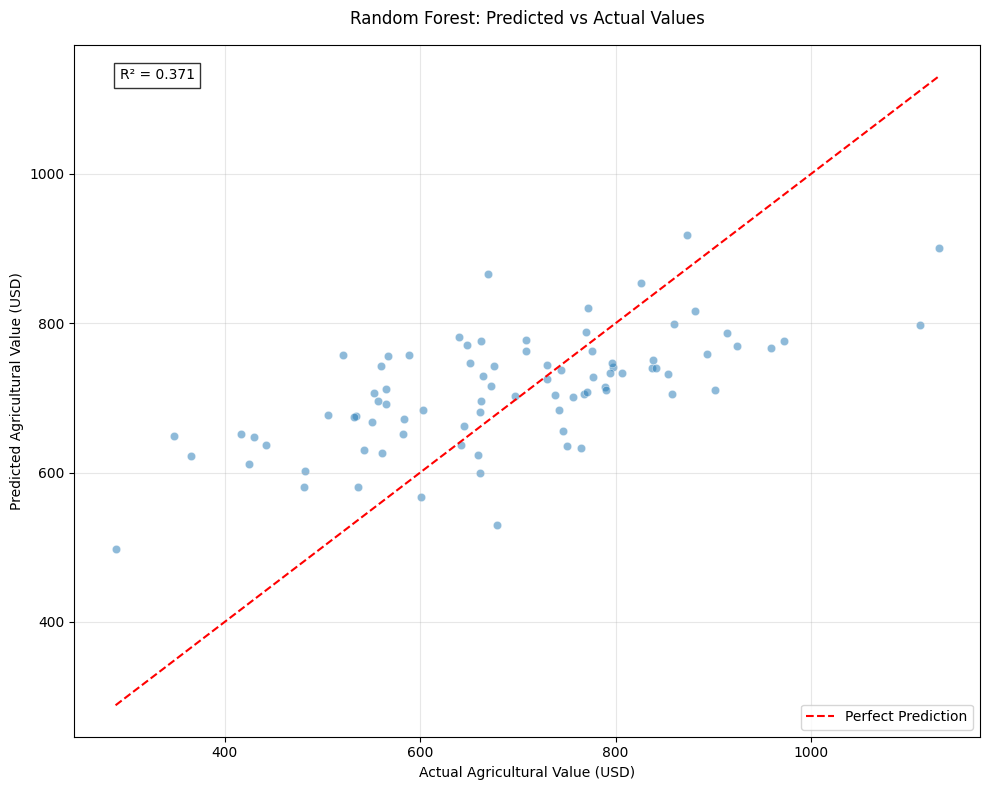


Prediction Statistics:
Mean Actual Value: 688.97
Mean Predicted Value: 710.21
Standard Deviation of Actual Values: 162.52
Standard Deviation of Predictions: 75.53


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=predictions_rf, alpha=0.5)

# Add the perfect prediction line (y=x)
line_coords = [min(Y_test.min(), predictions_rf.min()), max(Y_test.max(), predictions_rf.max())]
plt.plot(line_coords, line_coords, 'r--', label='Perfect Prediction')

# Customize the plot
plt.title('Random Forest: Predicted vs Actual Values', fontsize=12, pad=15)
plt.xlabel('Actual Agricultural Value (USD)', fontsize=10)
plt.ylabel('Predicted Agricultural Value (USD)', fontsize=10)

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r2_rf:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("\nPrediction Statistics:")
print(f"Mean Actual Value: {Y_test.mean():.2f}")
print(f"Mean Predicted Value: {predictions_rf.mean():.2f}")
print(f"Standard Deviation of Actual Values: {Y_test.std():.2f}")
print(f"Standard Deviation of Predictions: {predictions_rf.std():.2f}")

*RANDOM FOREST: RESIDUALS PLOT*

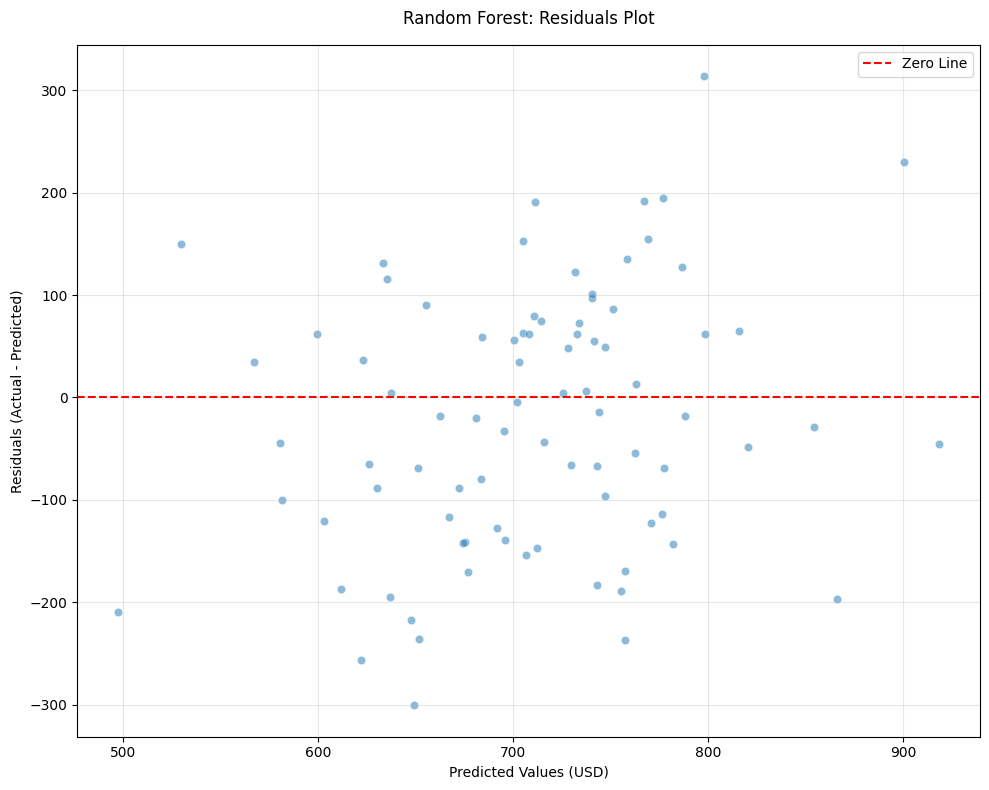


Residuals Statistics:
Mean of Residuals: -21.24
Standard Deviation of Residuals: 126.38
Minimum Residual: -300.56
Maximum Residual: 313.64
Median Residual: -19.05


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals
residuals_rf = Y_test - predictions_rf

# Create the residuals plot
plt.figure(figsize=(10, 8))

# Scatter plot of predicted values vs residuals
sns.scatterplot(x=predictions_rf, y=residuals_rf, alpha=0.5)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Customize the plot
plt.title('Random Forest: Residuals Plot', fontsize=12, pad=15)
plt.xlabel('Predicted Values (USD)', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print residual statistics
print("\nResiduals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals_rf):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals_rf):.2f}")
print(f"Minimum Residual: {np.min(residuals_rf):.2f}")
print(f"Maximum Residual: {np.max(residuals_rf):.2f}")
print(f"Median Residual: {np.median(residuals_rf):.2f}")

**KNN REGRESSOR**

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the scalable model with KNeighborsRegressor
knn_model = ScalableModel(model=KNeighborsRegressor(n_neighbors=5, weights='uniform'), 
                         feature_scaler=MinMaxScaler(), 
                         target_scaler=MinMaxScaler())

# Train the model with scaled data
knn_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(Y_test, predictions_knn)
mae_knn = mean_absolute_error(Y_test, predictions_knn)
r2_knn = r2_score(Y_test, predictions_knn)
rmse_knn = np.sqrt(mse_knn)

# Print evaluation metrics
print(f'MSE: {mse_knn:.3f}')
print(f'MAE: {mae_knn:.3f}')
print(f'R^2: {r2_knn:.3f}')
print(f'RMSE: {rmse_knn:.3f}')
print(f'RMSE: {rmse_rf:.3f}')

Scaled Predictions Min/Max: 0.15713019919846793, 0.6958908074485765
Inverse Transformed Predictions Min/Max: 478.9296183442734, 980.8924663532773
MSE: 14913.175
MAE: 101.265
R^2: 0.429
RMSE: 122.120
RMSE: 128.156


*KNN REGRESSOR PREDICTIONS*

In [24]:
# Select one random index from the test set
random_index = np.random.choice(len(X_test), 1, replace=False)[0]

# Extract actual feature set and corresponding actual target value
actual_features = X_test.iloc[random_index]
actual_value = Y_test.iloc[random_index]

# Make prediction using the KNN model
predicted_value_knn = knn_model.predict(actual_features.values.reshape(1, -1))[0]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Features': [actual_features.values],
    'Predicted Value (Original Scale)': [predicted_value_knn],
    'Actual Value (Original Scale)': [actual_value]
}, index=[random_index])

# Print the comparison
print("\nComparison of Predicted vs. Actual Agricultural Value (KNN Model):")
print(comparison_df)

# Print the absolute difference between predicted and actual values
print(f"\nAbsolute Difference: {abs(predicted_value_knn - actual_value):.2f}")

Scaled Predictions Min/Max: 0.47249929390384604, 0.47249929390384604
Inverse Transformed Predictions Min/Max: 772.758763475173, 772.758763475173

Comparison of Predicted vs. Actual Agricultural Value (KNN Model):
                                     Actual Features  \
9  [3.054151993, 1.53968254, 1.53968254, 1.539682...   

   Predicted Value (Original Scale)  Actual Value (Original Scale)  
9                        772.758763                     663.796069  

Absolute Difference: 108.96


c:\Users\LPT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


*KNN REGRESSOR: PREDICTED vs ACTUAL*

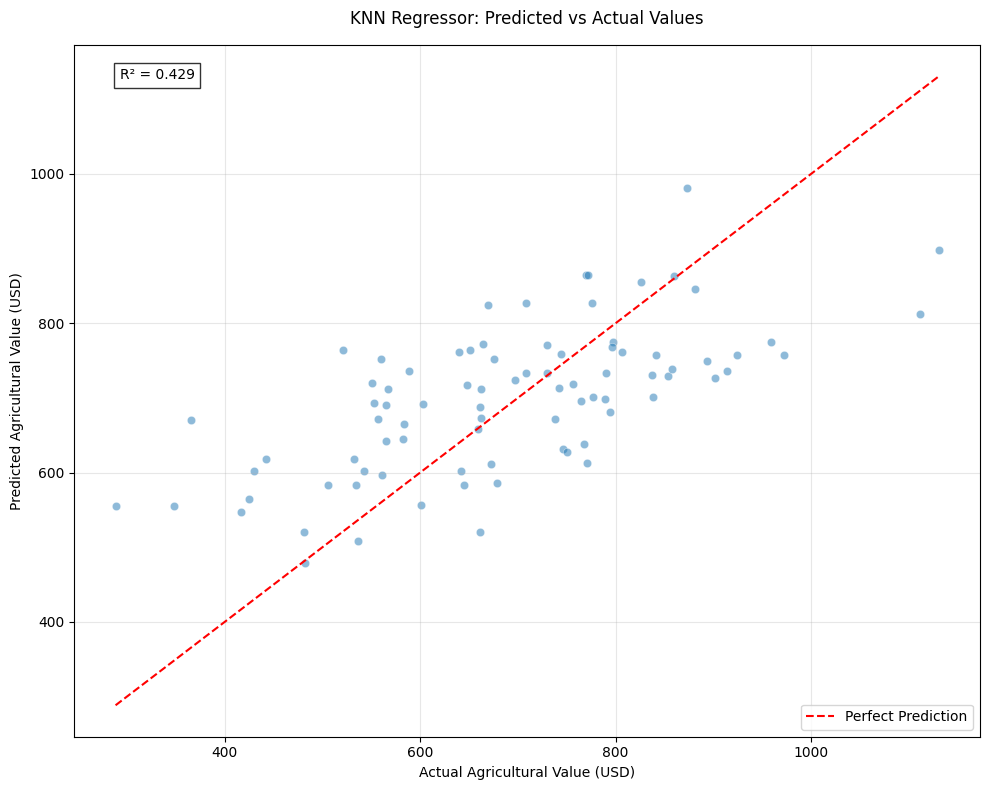


Prediction Statistics:
Mean Actual Value: 688.97
Mean Predicted Value: 698.93
Standard Deviation of Actual Values: 162.52
Standard Deviation of Predictions: 96.48


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=predictions_knn, alpha=0.5)

# Add the perfect prediction line (y=x)
line_coords = [min(Y_test.min(), predictions_knn.min()), max(Y_test.max(), predictions_knn.max())]
plt.plot(line_coords, line_coords, 'r--', label='Perfect Prediction')

# Customize the plot
plt.title('KNN Regressor: Predicted vs Actual Values', fontsize=12, pad=15)
plt.xlabel('Actual Agricultural Value (USD)', fontsize=10)
plt.ylabel('Predicted Agricultural Value (USD)', fontsize=10)

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r2_knn:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("\nPrediction Statistics:")
print(f"Mean Actual Value: {Y_test.mean():.2f}")
print(f"Mean Predicted Value: {predictions_knn.mean():.2f}")
print(f"Standard Deviation of Actual Values: {Y_test.std():.2f}")
print(f"Standard Deviation of Predictions: {predictions_knn.std():.2f}")

*KNN RESIDUALS PLOT*

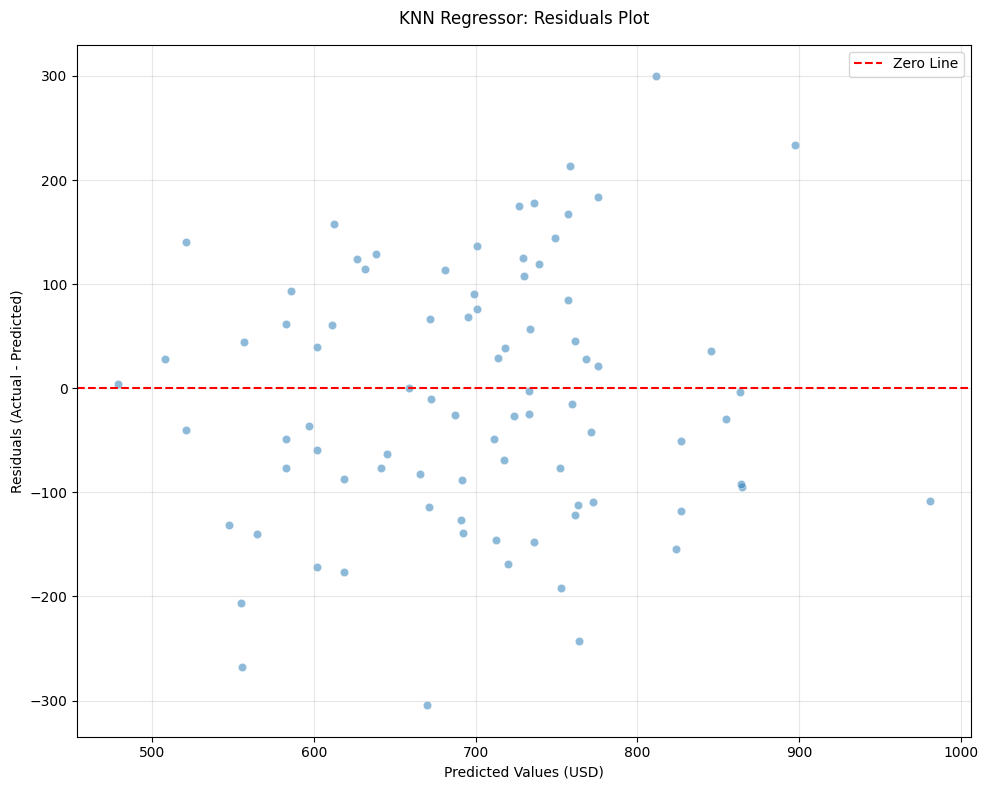


KNN Residuals Statistics:
Mean of Residuals: -9.96
Standard Deviation of Residuals: 121.71
Minimum Residual: -304.51
Maximum Residual: 299.65
Median Residual: -20.01


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals for KNN
residuals_knn = Y_test - predictions_knn

# Create the residuals plot
plt.figure(figsize=(10, 8))

# Scatter plot of predicted values vs residuals
sns.scatterplot(x=predictions_knn, y=residuals_knn, alpha=0.5)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Customize the plot
plt.title('KNN Regressor: Residuals Plot', fontsize=12, pad=15)
plt.xlabel('Predicted Values (USD)', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print residual statistics
print("\nKNN Residuals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals_knn):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals_knn):.2f}")
print(f"Minimum Residual: {np.min(residuals_knn):.2f}")
print(f"Maximum Residual: {np.max(residuals_knn):.2f}")
print(f"Median Residual: {np.median(residuals_knn):.2f}")

**XGBOOST MODEL**

In [25]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the scalable model with XGBRegressor
xgb_model = ScalableModel(model=XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler())

# Train the model with scaled data
xgb_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(Y_test, predictions_xgb)
mae_xgb = mean_absolute_error(Y_test, predictions_xgb)
r2_xgb = r2_score(Y_test, predictions_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Print evaluation metrics
print("XGBoost Model Metrics:")
print(f'MSE: {mse_xgb:.3f}')
print(f'MAE: {mae_xgb:.3f}')
print(f'R^2: {r2_xgb:.3f}')
print(f'RMSE: {rmse_xgb:.3f}')



Scaled Predictions Min/Max: 0.1668071299791336, 0.6641611456871033
Inverse Transformed Predictions Min/Max: 487.94561767578125, 951.3298950195312
XGBoost Model Metrics:
MSE: 17660.165
MAE: 111.125
R^2: 0.323
RMSE: 132.892


*MAKE RANDOM PREDICTIONS USING THE XGBOOST MODEL*

In [29]:
# Select one random index from the test set
random_index = np.random.choice(len(X_test), 1, replace=False)[0]

# Extract actual feature set and corresponding actual target value
actual_features = X_test.iloc[random_index]
actual_value = Y_test.iloc[random_index]

# Make prediction using the XGBoost model
predicted_value_xgb = xgb_model.predict(actual_features.values.reshape(1, -1))[0]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Features': [actual_features.values],
    'Predicted Value (Original Scale)': [predicted_value_xgb],
    'Actual Value (Original Scale)': [actual_value]
}, index=[random_index])

# Print the comparison
print("\nComparison of Predicted vs. Actual Agricultural Value (XGBoost Model):")
print(comparison_df)

# Print the absolute difference between predicted and actual values
print(f"\nAbsolute Difference: {abs(predicted_value_xgb - actual_value):.2f}")

Scaled Predictions Min/Max: 0.36801084876060486, 0.36801084876060486
Inverse Transformed Predictions Min/Max: 675.4069213867188, 675.4069213867188

Comparison of Predicted vs. Actual Agricultural Value (XGBoost Model):
                                      Actual Features  \
66  [3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.032258065, 0....   

    Predicted Value (Original Scale)  Actual Value (Original Scale)  
66                        675.406921                     441.931532  

Absolute Difference: 233.48


c:\Users\LPT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


*XGBOOST: PREDICTED vs ACTUAL PLOT*

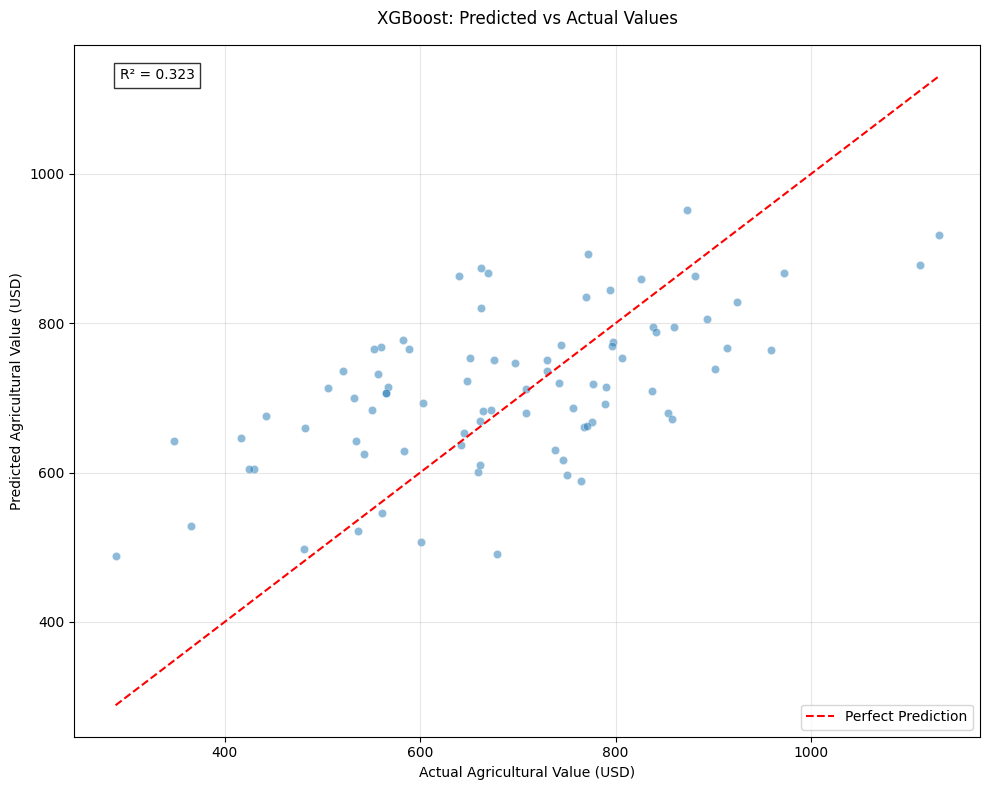


Prediction Statistics:
Mean Actual Value: 688.97
Mean Predicted Value: 712.54
Standard Deviation of Actual Values: 162.52
Standard Deviation of Predictions: 101.23


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=predictions_xgb, alpha=0.5)

# Add the perfect prediction line (y=x)
line_coords = [min(Y_test.min(), predictions_xgb.min()), max(Y_test.max(), predictions_xgb.max())]
plt.plot(line_coords, line_coords, 'r--', label='Perfect Prediction')

# Customize the plot
plt.title('XGBoost: Predicted vs Actual Values', fontsize=12, pad=15)
plt.xlabel('Actual Agricultural Value (USD)', fontsize=10)
plt.ylabel('Predicted Agricultural Value (USD)', fontsize=10)

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r2_xgb:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("\nPrediction Statistics:")
print(f"Mean Actual Value: {Y_test.mean():.2f}")
print(f"Mean Predicted Value: {predictions_xgb.mean():.2f}")
print(f"Standard Deviation of Actual Values: {Y_test.std():.2f}")
print(f"Standard Deviation of Predictions: {predictions_xgb.std():.2f}")

*XGBOOST RESIDUALS PLOT*

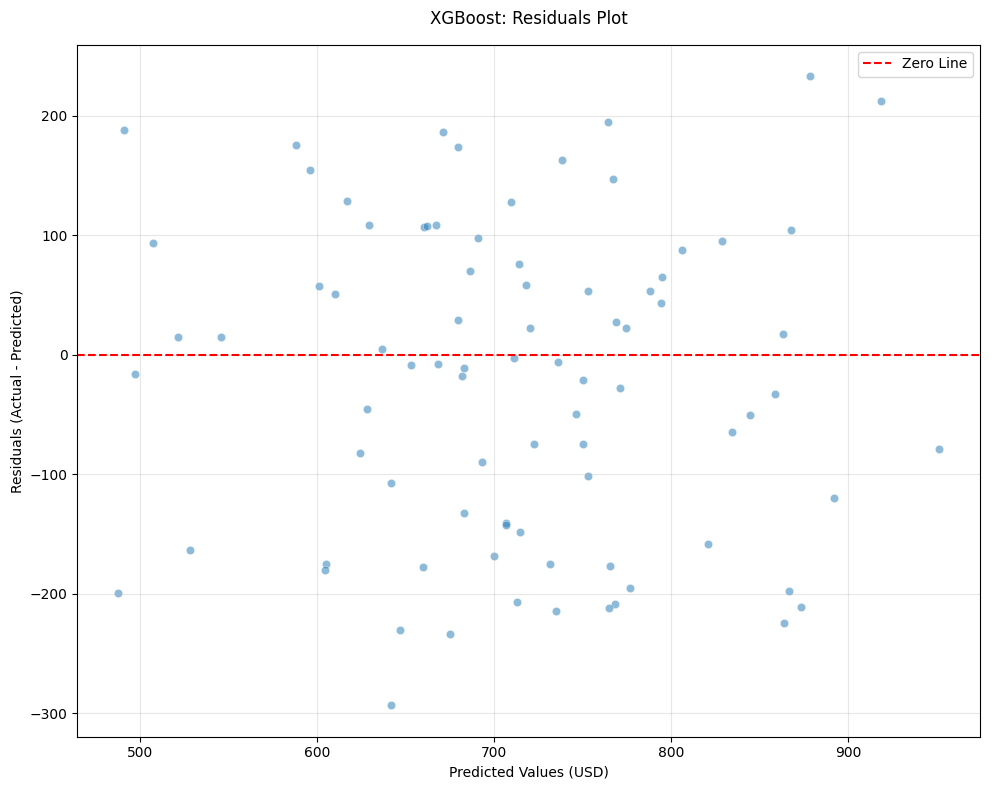


XGBoost Residuals Statistics:
Mean of Residuals: -23.57
Standard Deviation of Residuals: 130.78
Minimum Residual: -293.31
Maximum Residual: 233.03
Median Residual: -9.85


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals for XGBoost
residuals_xgb = Y_test - predictions_xgb

# Create the residuals plot
plt.figure(figsize=(10, 8))

# Scatter plot of predicted values vs residuals
sns.scatterplot(x=predictions_xgb, y=residuals_xgb, alpha=0.5)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Customize the plot
plt.title('XGBoost: Residuals Plot', fontsize=12, pad=15)
plt.xlabel('Predicted Values (USD)', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print residual statistics
print("\nXGBoost Residuals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals_xgb):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals_xgb):.2f}")
print(f"Minimum Residual: {np.min(residuals_xgb):.2f}")
print(f"Maximum Residual: {np.max(residuals_xgb):.2f}")
print(f"Median Residual: {np.median(residuals_xgb):.2f}")

**SVM MODEL**

In [30]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the scalable model with SVR (Support Vector Regression)
svm_model = ScalableModel(model=SVR(
    kernel='rbf',  # Radial Basis Function kernel
    C=1.0,        # Regularization parameter
    epsilon=0.1,   # Epsilon in the epsilon-SVR model
    gamma='scale'  # Kernel coefficient
), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler())

# Train the model with scaled data
svm_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_svm = svm_model.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(Y_test, predictions_svm)
mae_svm = mean_absolute_error(Y_test, predictions_svm)
r2_svm = r2_score(Y_test, predictions_svm)
rmse_svm = np.sqrt(mse_svm)

# Print evaluation metrics
print("SVM Model Metrics:")
print(f'MSE: {mse_svm:.3f}')
print(f'MAE: {mae_svm:.3f}')
print(f'R^2: {r2_svm:.3f}')
print(f'RMSE: {rmse_svm:.3f}')



Scaled Predictions Min/Max: 0.1560150196824942, 0.6322827458603066
Inverse Transformed Predictions Min/Max: 477.890606439343, 921.6288838599601
SVM Model Metrics:
MSE: 15169.227
MAE: 102.960
R^2: 0.419
RMSE: 123.163


*MAKE RANDOM PREDICTIONS USING THE SVM*

In [37]:
# Select one random index from the test set
random_index = np.random.choice(len(X_test), 1, replace=False)[0]

# Extract actual feature set and corresponding actual target value
actual_features = X_test.iloc[random_index]
actual_value = Y_test.iloc[random_index]

# Make prediction using the SVM model
predicted_value_svm = svm_model.predict(actual_features.values.reshape(1, -1))[0]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Features': [actual_features.values],
    'Predicted Value (Original Scale)': [predicted_value_svm],
    'Actual Value (Original Scale)': [actual_value]
}, index=[random_index])

# Print the comparison
print("\nComparison of Predicted vs. Actual Agricultural Value (SVM Model):")
print(comparison_df)

# Print the absolute difference between predicted and actual values
print(f"\nAbsolute Difference: {abs(predicted_value_svm - actual_value):.2f}")

Scaled Predictions Min/Max: 0.2957284323582416, 0.2957284323582416
Inverse Transformed Predictions Min/Max: 608.0614865256958, 608.0614865256958

Comparison of Predicted vs. Actual Agricultural Value (SVM Model):
                                      Actual Features  \
29  [3.017241379, 3.017241379, 3.017241379, 3.0172...   

    Predicted Value (Original Scale)  Actual Value (Original Scale)  
29                        608.061487                     482.560328  

Absolute Difference: 125.50


c:\Users\LPT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


*SVM: PREDICTED vs ACTUAL*

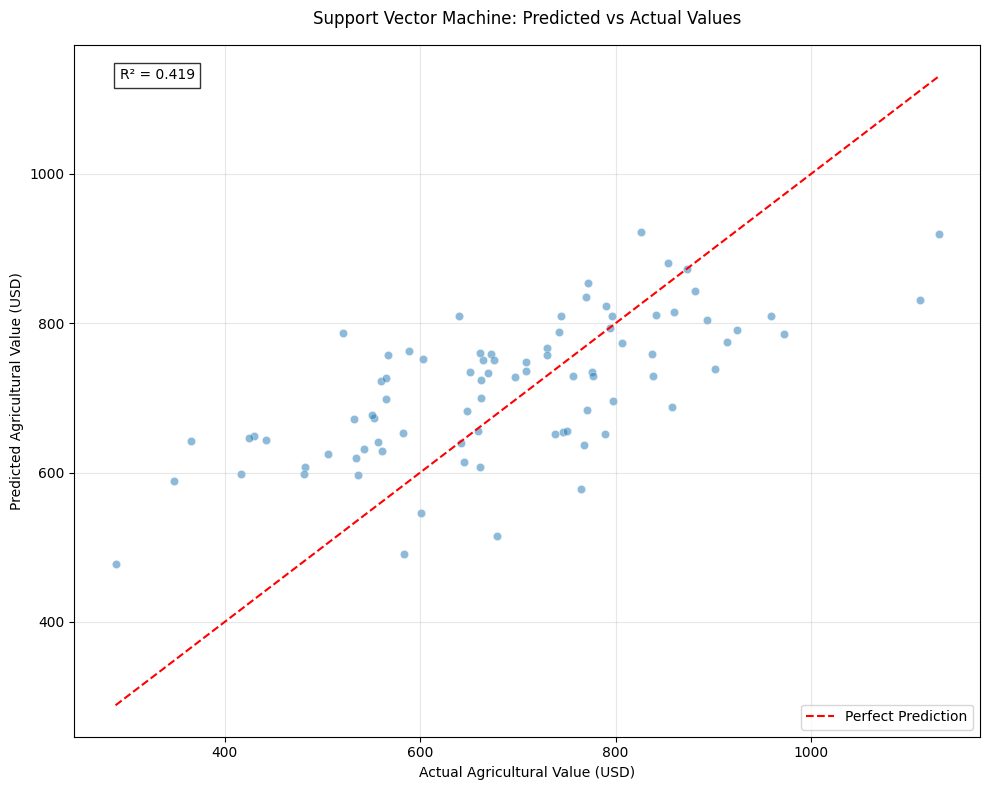


Prediction Statistics:
Mean Actual Value: 688.97
Mean Predicted Value: 713.58
Standard Deviation of Actual Values: 162.52
Standard Deviation of Predictions: 92.37


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=predictions_svm, alpha=0.5)

# Add the perfect prediction line (y=x)
line_coords = [min(Y_test.min(), predictions_svm.min()), max(Y_test.max(), predictions_svm.max())]
plt.plot(line_coords, line_coords, 'r--', label='Perfect Prediction')

# Customize the plot
plt.title('Support Vector Machine: Predicted vs Actual Values', fontsize=12, pad=15)
plt.xlabel('Actual Agricultural Value (USD)', fontsize=10)
plt.ylabel('Predicted Agricultural Value (USD)', fontsize=10)

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r2_svm:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("\nPrediction Statistics:")
print(f"Mean Actual Value: {Y_test.mean():.2f}")
print(f"Mean Predicted Value: {predictions_svm.mean():.2f}")
print(f"Standard Deviation of Actual Values: {Y_test.std():.2f}")
print(f"Standard Deviation of Predictions: {predictions_svm.std():.2f}")

*RESIDUALS PLOT*

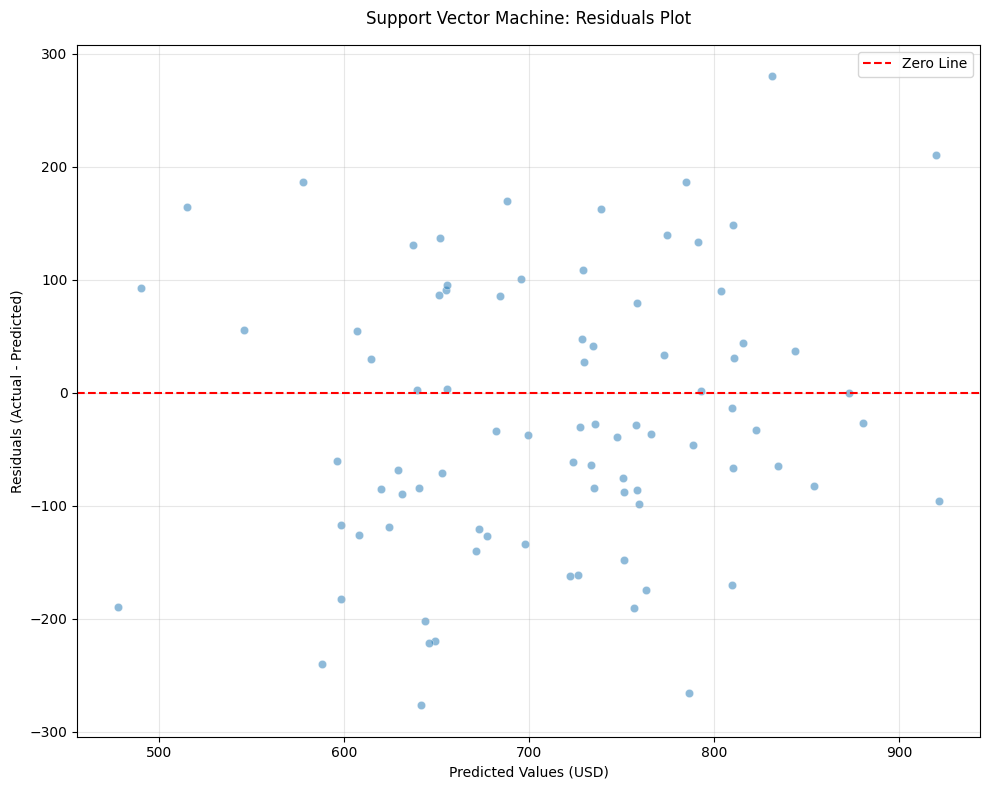


SVM Residuals Statistics:
Mean of Residuals: -24.60
Standard Deviation of Residuals: 120.68
Minimum Residual: -276.48
Maximum Residual: 280.09
Median Residual: -35.13


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals for SVM
residuals_svm = Y_test - predictions_svm

# Create the residuals plot
plt.figure(figsize=(10, 8))

# Scatter plot of predicted values vs residuals
sns.scatterplot(x=predictions_svm, y=residuals_svm, alpha=0.5)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Customize the plot
plt.title('Support Vector Machine: Residuals Plot', fontsize=12, pad=15)
plt.xlabel('Predicted Values (USD)', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print residual statistics
print("\nSVM Residuals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals_svm):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals_svm):.2f}")
print(f"Minimum Residual: {np.min(residuals_svm):.2f}")
print(f"Maximum Residual: {np.max(residuals_svm):.2f}")
print(f"Median Residual: {np.median(residuals_svm):.2f}")

**RIDGE REGRESSION**

In [38]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the scalable model with Ridge Regression
ridge_model = ScalableModel(model=Ridge(
    alpha=1.0,      # Regularization strength
    random_state=42 # For reproducibility
), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler())

# Train the model with scaled data
ridge_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(Y_test, predictions_ridge)
mae_ridge = mean_absolute_error(Y_test, predictions_ridge)
r2_ridge = r2_score(Y_test, predictions_ridge)
rmse_ridge = np.sqrt(mse_ridge)

# Print evaluation metrics
print("Ridge Regression Model Metrics:")
print(f'MSE: {mse_ridge:.3f}')
print(f'MAE: {mae_ridge:.3f}')
print(f'R^2: {r2_ridge:.3f}')
print(f'RMSE: {rmse_ridge:.3f}')



Scaled Predictions Min/Max: 0.17919570671904078, 0.6639303011212728
Inverse Transformed Predictions Min/Max: 499.488034880638, 951.1148869716468
Ridge Regression Model Metrics:
MSE: 17232.405
MAE: 105.692
R^2: 0.340
RMSE: 131.272


*RIDGE REGRESSION RANDOM PREDICTIONS*

In [39]:
# Select one random index from the test set
random_index = np.random.choice(len(X_test), 1, replace=False)[0]

# Extract actual feature set and corresponding actual target value
actual_features = X_test.iloc[random_index]
actual_value = Y_test.iloc[random_index]

# Make prediction using the Ridge model
predicted_value_ridge = ridge_model.predict(actual_features.values.reshape(1, -1))[0]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Features': [actual_features.values],
    'Predicted Value (Original Scale)': [predicted_value_ridge],
    'Actual Value (Original Scale)': [actual_value]
}, index=[random_index])

# Print the comparison
print("\nComparison of Predicted vs. Actual Agricultural Value (Ridge Model):")
print(comparison_df)

# Print the absolute difference between predicted and actual values
print(f"\nAbsolute Difference: {abs(predicted_value_ridge - actual_value):.2f}")

Scaled Predictions Min/Max: 0.425227530144792, 0.425227530144792
Inverse Transformed Predictions Min/Max: 728.7156972161639, 728.7156972161639

Comparison of Predicted vs. Actual Agricultural Value (Ridge Model):
                                      Actual Features  \
45  [3.162162162, 0.0, 3.162162162, 0.0, 0.3513513...   

    Predicted Value (Original Scale)  Actual Value (Original Scale)  
45                        728.715697                     565.517039  

Absolute Difference: 163.20


c:\Users\LPT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


*RIDGE REGRESSION: PREDICTED vs ACTUAL*

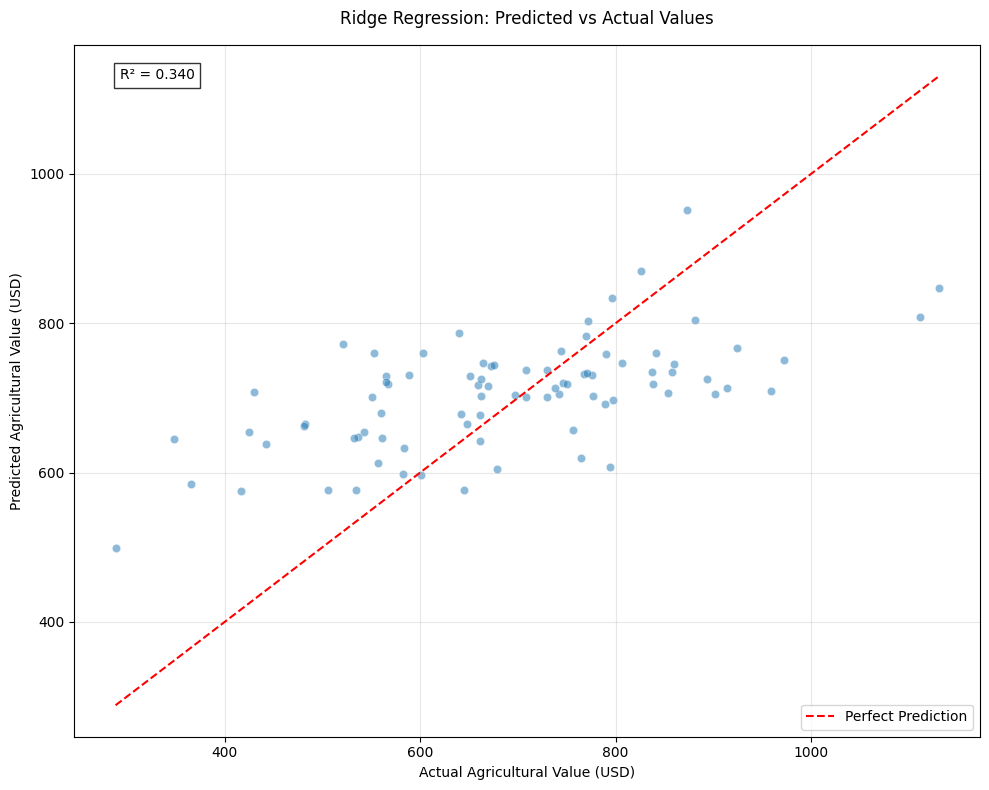


Prediction Statistics:
Mean Actual Value: 688.97
Mean Predicted Value: 704.66
Standard Deviation of Actual Values: 162.52
Standard Deviation of Predictions: 71.91


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=predictions_ridge, alpha=0.5)

# Add the perfect prediction line (y=x)
line_coords = [min(Y_test.min(), predictions_ridge.min()), max(Y_test.max(), predictions_ridge.max())]
plt.plot(line_coords, line_coords, 'r--', label='Perfect Prediction')

# Customize the plot
plt.title('Ridge Regression: Predicted vs Actual Values', fontsize=12, pad=15)
plt.xlabel('Actual Agricultural Value (USD)', fontsize=10)
plt.ylabel('Predicted Agricultural Value (USD)', fontsize=10)

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r2_ridge:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("\nPrediction Statistics:")
print(f"Mean Actual Value: {Y_test.mean():.2f}")
print(f"Mean Predicted Value: {predictions_ridge.mean():.2f}")
print(f"Standard Deviation of Actual Values: {Y_test.std():.2f}")
print(f"Standard Deviation of Predictions: {predictions_ridge.std():.2f}")

*RIDGE REGRESSION RESIDUAL PLOT*

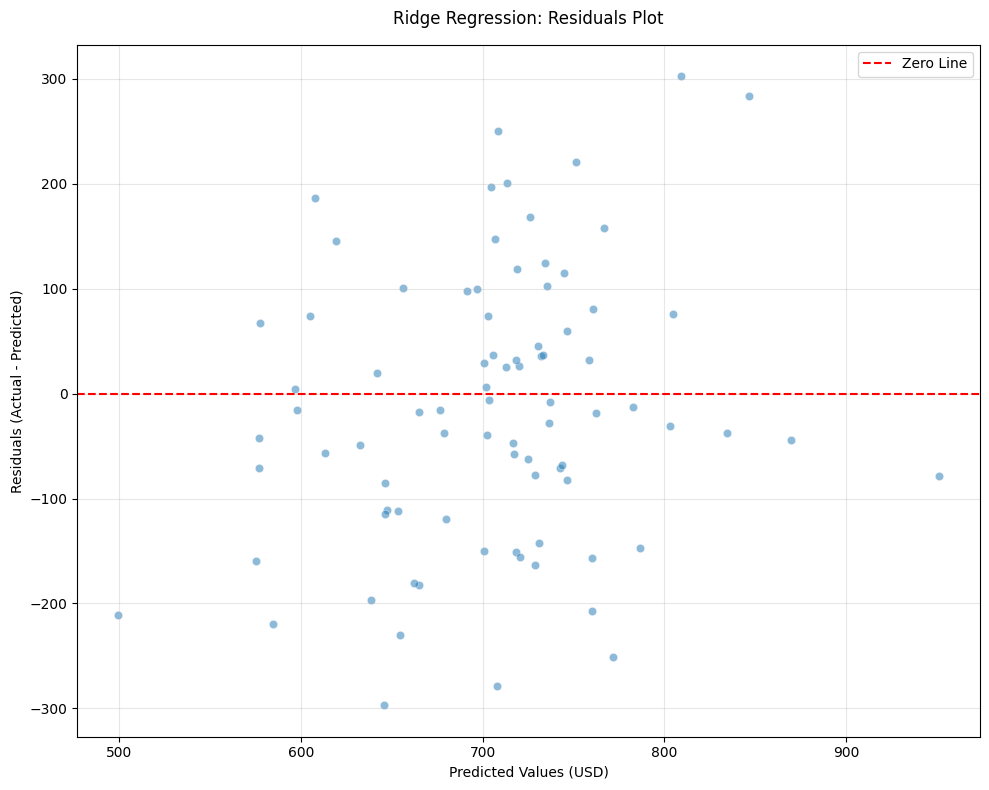


Ridge Regression Residuals Statistics:
Mean of Residuals: -15.68
Standard Deviation of Residuals: 130.33
Minimum Residual: -297.06
Maximum Residual: 302.45
Median Residual: -17.66


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals for Ridge Regression
residuals_ridge = Y_test - predictions_ridge

# Create the residuals plot
plt.figure(figsize=(10, 8))

# Scatter plot of predicted values vs residuals
sns.scatterplot(x=predictions_ridge, y=residuals_ridge, alpha=0.5)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Customize the plot
plt.title('Ridge Regression: Residuals Plot', fontsize=12, pad=15)
plt.xlabel('Predicted Values (USD)', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print residual statistics
print("\nRidge Regression Residuals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals_ridge):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals_ridge):.2f}")
print(f"Minimum Residual: {np.min(residuals_ridge):.2f}")
print(f"Maximum Residual: {np.max(residuals_ridge):.2f}")
print(f"Median Residual: {np.median(residuals_ridge):.2f}")

**LASSO REGRESSION**

In [40]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the scalable model with Lasso Regression
lasso_model = ScalableModel(model=Lasso(
    alpha=1.0,      # Regularization strength
    random_state=42,# For reproducibility
    max_iter=1000   # Maximum number of iterations
), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler())

# Train the model with scaled data
lasso_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(Y_test, predictions_lasso)
mae_lasso = mean_absolute_error(Y_test, predictions_lasso)
r2_lasso = r2_score(Y_test, predictions_lasso)
rmse_lasso = np.sqrt(mse_lasso)

# Print evaluation metrics
print("Lasso Regression Model Metrics:")
print(f'MSE: {mse_lasso:.3f}')
print(f'MAE: {mae_lasso:.3f}')
print(f'R^2: {r2_lasso:.3f}')
print(f'RMSE: {rmse_lasso:.3f}')



Scaled Predictions Min/Max: 0.4065926916663292, 0.4065926916663292
Inverse Transformed Predictions Min/Max: 711.3536324111317, 711.3536324111317
Lasso Regression Model Metrics:
MSE: 26599.613
MAE: 130.713
R^2: -0.019
RMSE: 163.094


*LASSO REGRESSION RANDOM PREDICTIONS*

In [41]:
# Select one random index from the test set
random_index = np.random.choice(len(X_test), 1, replace=False)[0]

# Extract actual feature set and corresponding actual target value
actual_features = X_test.iloc[random_index]
actual_value = Y_test.iloc[random_index]

# Make prediction using the Lasso model
predicted_value_lasso = lasso_model.predict(actual_features.values.reshape(1, -1))[0]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Features': [actual_features.values],
    'Predicted Value (Original Scale)': [predicted_value_lasso],
    'Actual Value (Original Scale)': [actual_value]
}, index=[random_index])

# Print the comparison
print("\nComparison of Predicted vs. Actual Agricultural Value (Lasso Model):")
print(comparison_df)

# Print the absolute difference between predicted and actual values
print(f"\nAbsolute Difference: {abs(predicted_value_lasso - actual_value):.2f}")

# Print number of features used (non-zero coefficients)
n_features_used = np.sum(lasso_model.model.coef_ != 0)
print(f"\nNumber of features used by Lasso: {n_features_used}")

Scaled Predictions Min/Max: 0.4065926916663292, 0.4065926916663292
Inverse Transformed Predictions Min/Max: 711.3536324111317, 711.3536324111317

Comparison of Predicted vs. Actual Agricultural Value (Lasso Model):
                                      Actual Features  \
72  [0.656756757, 0.656756757, 0.437837838, 0.0, 0...   

    Predicted Value (Original Scale)  Actual Value (Original Scale)  
72                        711.353632                     648.045045  

Absolute Difference: 63.31

Number of features used by Lasso: 0


c:\Users\LPT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


*LASSO REGRESSION: PREDICTED vs ACTUAL*

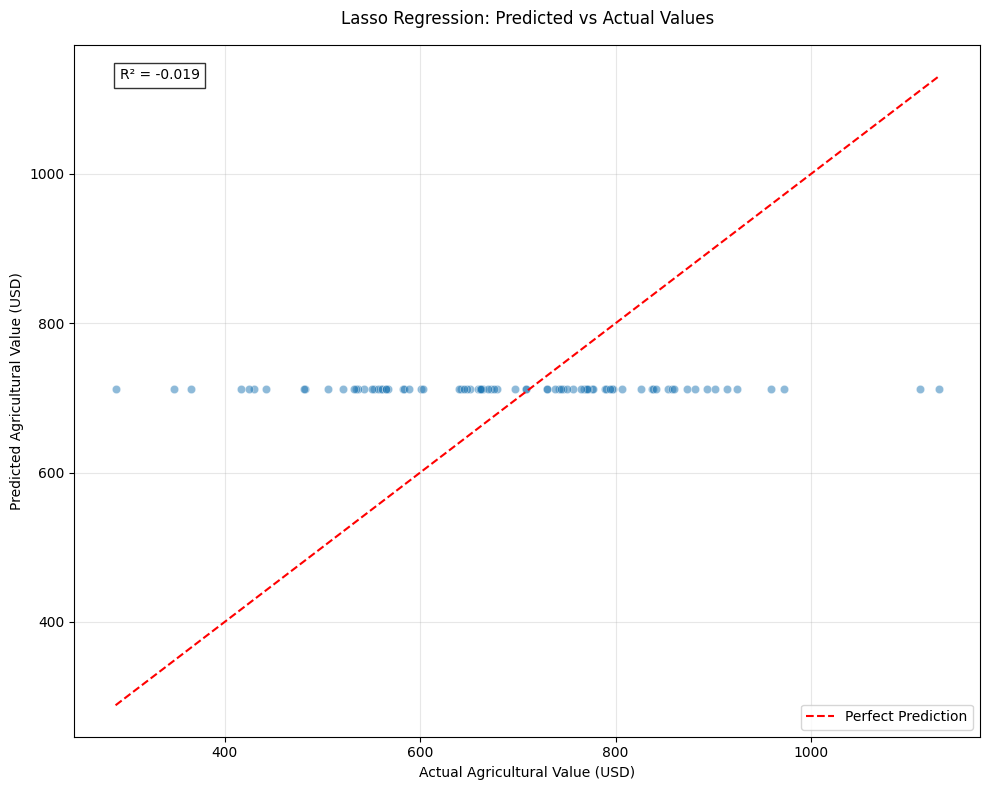


Prediction Statistics:
Mean Actual Value: 688.97
Mean Predicted Value: 711.35
Standard Deviation of Actual Values: 162.52
Standard Deviation of Predictions: 0.00


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=predictions_lasso, alpha=0.5)

# Add the perfect prediction line (y=x)
line_coords = [min(Y_test.min(), predictions_lasso.min()), max(Y_test.max(), predictions_lasso.max())]
plt.plot(line_coords, line_coords, 'r--', label='Perfect Prediction')

# Customize the plot
plt.title('Lasso Regression: Predicted vs Actual Values', fontsize=12, pad=15)
plt.xlabel('Actual Agricultural Value (USD)', fontsize=10)
plt.ylabel('Predicted Agricultural Value (USD)', fontsize=10)

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r2_lasso:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("\nPrediction Statistics:")
print(f"Mean Actual Value: {Y_test.mean():.2f}")
print(f"Mean Predicted Value: {predictions_lasso.mean():.2f}")
print(f"Standard Deviation of Actual Values: {Y_test.std():.2f}")
print(f"Standard Deviation of Predictions: {predictions_lasso.std():.2f}")

*LASSO RESIDUAL PLOT*

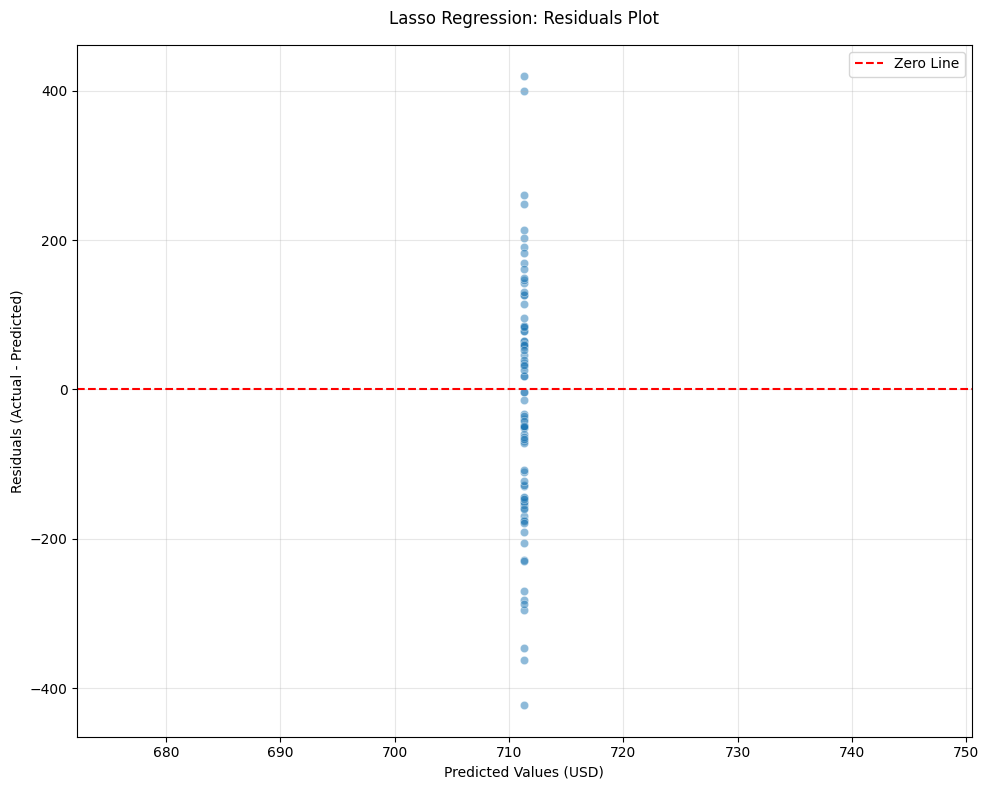


Lasso Regression Residuals Statistics:
Mean of Residuals: -22.38
Standard Deviation of Residuals: 161.55
Minimum Residual: -422.97
Maximum Residual: 419.25
Median Residual: -34.02


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals for Lasso Regression
residuals_lasso = Y_test - predictions_lasso

# Create the residuals plot
plt.figure(figsize=(10, 8))

# Scatter plot of predicted values vs residuals
sns.scatterplot(x=predictions_lasso, y=residuals_lasso, alpha=0.5)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Customize the plot
plt.title('Lasso Regression: Residuals Plot', fontsize=12, pad=15)
plt.xlabel('Predicted Values (USD)', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print residual statistics
print("\nLasso Regression Residuals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals_lasso):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals_lasso):.2f}")
print(f"Minimum Residual: {np.min(residuals_lasso):.2f}")
print(f"Maximum Residual: {np.max(residuals_lasso):.2f}")
print(f"Median Residual: {np.median(residuals_lasso):.2f}")

**ELASTIC NET REGRESSION**

In [42]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the scalable model with ElasticNet Regression
elastic_model = ScalableModel(model=ElasticNet(
    alpha=1.0,      # Regularization strength
    l1_ratio=0.5,   # Balance between L1 and L2 (0.5 = equal weight)
    random_state=42,# For reproducibility
    max_iter=1000   # Maximum number of iterations
), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler())

# Train the model with scaled data
elastic_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_elastic = elastic_model.predict(X_test)

# Evaluate the model
mse_elastic = mean_squared_error(Y_test, predictions_elastic)
mae_elastic = mean_absolute_error(Y_test, predictions_elastic)
r2_elastic = r2_score(Y_test, predictions_elastic)
rmse_elastic = np.sqrt(mse_elastic)

# Print evaluation metrics
print("Elastic Net Regression Model Metrics:")
print(f'MSE: {mse_elastic:.3f}')
print(f'MAE: {mae_elastic:.3f}')
print(f'R^2: {r2_elastic:.3f}')
print(f'RMSE: {rmse_elastic:.3f}')



Scaled Predictions Min/Max: 0.4065926916663292, 0.4065926916663292
Inverse Transformed Predictions Min/Max: 711.3536324111317, 711.3536324111317
Elastic Net Regression Model Metrics:
MSE: 26599.613
MAE: 130.713
R^2: -0.019
RMSE: 163.094


*ELASTIC NET RANDOM PREDICTIONS*

In [43]:
# Select one random index from the test set
random_index = np.random.choice(len(X_test), 1, replace=False)[0]

# Extract actual feature set and corresponding actual target value
actual_features = X_test.iloc[random_index]
actual_value = Y_test.iloc[random_index]

# Make prediction using the Elastic Net model
predicted_value_elastic = elastic_model.predict(actual_features.values.reshape(1, -1))[0]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Features': [actual_features.values],
    'Predicted Value (Original Scale)': [predicted_value_elastic],
    'Actual Value (Original Scale)': [actual_value]
}, index=[random_index])

# Print the comparison
print("\nComparison of Predicted vs. Actual Agricultural Value (Elastic Net Model):")
print(comparison_df)

# Print the absolute difference between predicted and actual values
print(f"\nAbsolute Difference: {abs(predicted_value_elastic - actual_value):.2f}")

# Print number of features used (non-zero coefficients)
n_features_used = np.sum(elastic_model.model.coef_ != 0)
print(f"\nNumber of features used by Elastic Net: {n_features_used}")

Scaled Predictions Min/Max: 0.4065926916663292, 0.4065926916663292
Inverse Transformed Predictions Min/Max: 711.3536324111317, 711.3536324111317

Comparison of Predicted vs. Actual Agricultural Value (Elastic Net Model):
                                      Actual Features  \
25  [3.052631579, 0.0, 3.052631579, 0.0, 0.3609022...   

    Predicted Value (Original Scale)  Actual Value (Original Scale)  
25                        711.353632                     769.900491  

Absolute Difference: 58.55

Number of features used by Elastic Net: 0


c:\Users\LPT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


*ELAATIC NET: PREDICTED vs ACTUAL*

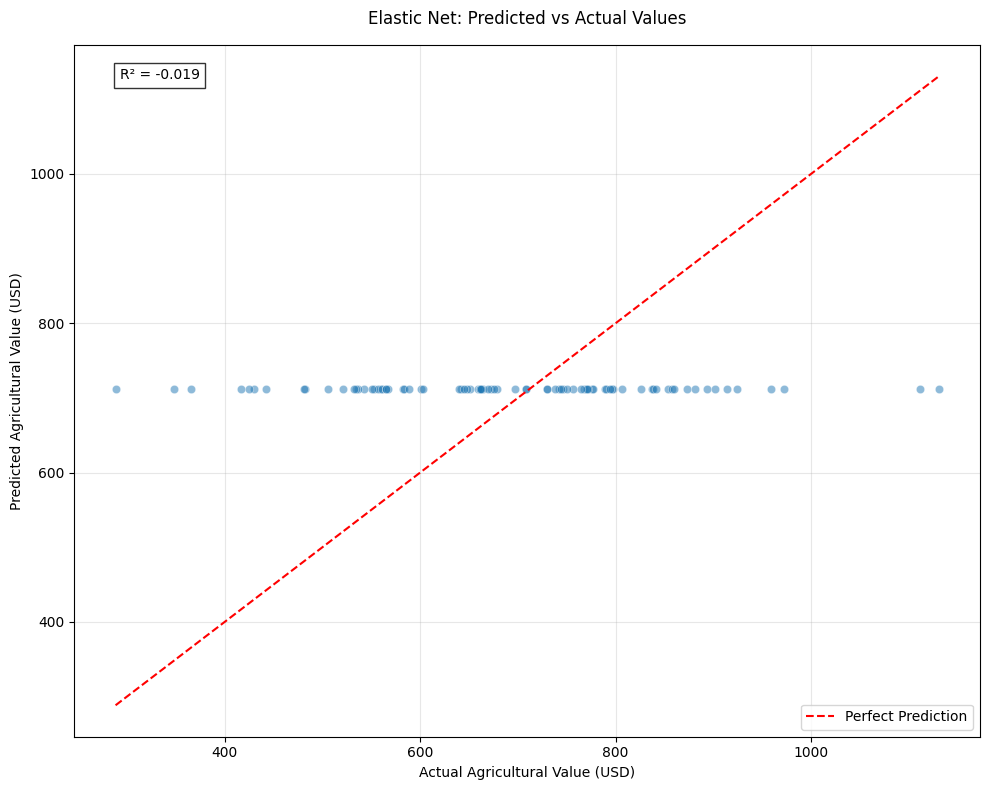


Prediction Statistics:
Mean Actual Value: 688.97
Mean Predicted Value: 711.35
Standard Deviation of Actual Values: 162.52
Standard Deviation of Predictions: 0.00


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=predictions_elastic, alpha=0.5)

# Add the perfect prediction line (y=x)
line_coords = [min(Y_test.min(), predictions_elastic.min()), max(Y_test.max(), predictions_elastic.max())]
plt.plot(line_coords, line_coords, 'r--', label='Perfect Prediction')

# Customize the plot
plt.title('Elastic Net: Predicted vs Actual Values', fontsize=12, pad=15)
plt.xlabel('Actual Agricultural Value (USD)', fontsize=10)
plt.ylabel('Predicted Agricultural Value (USD)', fontsize=10)

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r2_elastic:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("\nPrediction Statistics:")
print(f"Mean Actual Value: {Y_test.mean():.2f}")
print(f"Mean Predicted Value: {predictions_elastic.mean():.2f}")
print(f"Standard Deviation of Actual Values: {Y_test.std():.2f}")
print(f"Standard Deviation of Predictions: {predictions_elastic.std():.2f}")

*ELASTIC NET RESIDUALS*

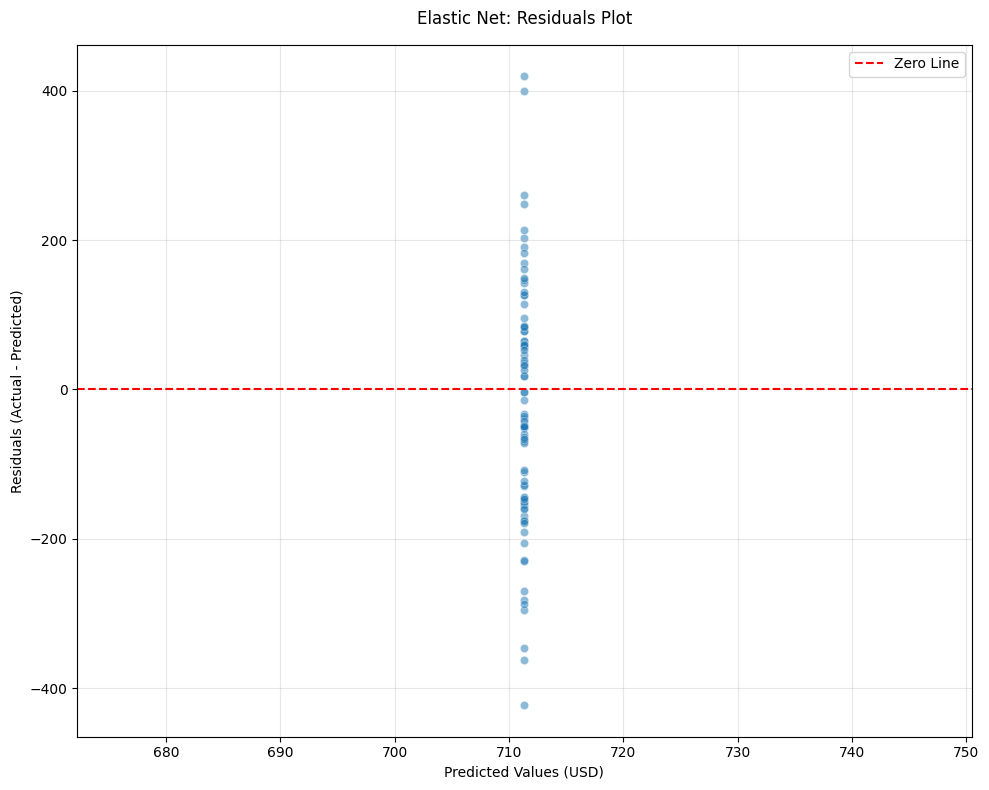


Elastic Net Residuals Statistics:
Mean of Residuals: -22.38
Standard Deviation of Residuals: 161.55
Minimum Residual: -422.97
Maximum Residual: 419.25
Median Residual: -34.02


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals for Elastic Net
residuals_elastic = Y_test - predictions_elastic

# Create the residuals plot
plt.figure(figsize=(10, 8))

# Scatter plot of predicted values vs residuals
sns.scatterplot(x=predictions_elastic, y=residuals_elastic, alpha=0.5)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Customize the plot
plt.title('Elastic Net: Residuals Plot', fontsize=12, pad=15)
plt.xlabel('Predicted Values (USD)', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print residual statistics
print("\nElastic Net Residuals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals_elastic):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals_elastic):.2f}")
print(f"Minimum Residual: {np.min(residuals_elastic):.2f}")
print(f"Maximum Residual: {np.max(residuals_elastic):.2f}")
print(f"Median Residual: {np.median(residuals_elastic):.2f}")

**DECISION TREE REGRESSOR**

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the scalable model with DecisionTreeRegressor
dt_model = ScalableModel(model=DecisionTreeRegressor(
    max_depth=6,           # Maximum depth of the tree
    min_samples_split=2,   # Minimum samples required to split
    min_samples_leaf=1,    # Minimum samples required at leaf node
    random_state=42        # For reproducibility
), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler())

# Train the model with scaled data
dt_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(Y_test, predictions_dt)
mae_dt = mean_absolute_error(Y_test, predictions_dt)
r2_dt = r2_score(Y_test, predictions_dt)
rmse_dt = np.sqrt(mse_dt)

# Print evaluation metrics
print("Decision Tree Regressor Metrics:")
print(f'MSE: {mse_dt:.3f}')
print(f'MAE: {mae_dt:.3f}')
print(f'R^2: {r2_dt:.3f}')
print(f'RMSE: {rmse_dt:.3f}')



Scaled Predictions Min/Max: 0.09562752191480313, 0.7074902918903531
Inverse Transformed Predictions Min/Max: 421.62762080262075, 991.6996971653847
Decision Tree Regressor Metrics:
MSE: 28188.441
MAE: 132.542
R^2: -0.080
RMSE: 167.894


*DECISION TREE REGRESSOR RANDOM PREDICTIONS*

In [45]:
# Select one random index from the test set
random_index = np.random.choice(len(X_test), 1, replace=False)[0]

# Extract actual feature set and corresponding actual target value
actual_features = X_test.iloc[random_index]
actual_value = Y_test.iloc[random_index]

# Make prediction using the Decision Tree model
predicted_value_dt = dt_model.predict(actual_features.values.reshape(1, -1))[0]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Features': [actual_features.values],
    'Predicted Value (Original Scale)': [predicted_value_dt],
    'Actual Value (Original Scale)': [actual_value]
}, index=[random_index])

# Print the comparison
print("\nComparison of Predicted vs. Actual Agricultural Value (Decision Tree Model):")
print(comparison_df)

# Print the absolute difference between predicted and actual values
print(f"\nAbsolute Difference: {abs(predicted_value_dt - actual_value):.2f}")

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.model.feature_importances_
}).sort_values('Importance', ascending=False)

# Print top 10 most important features
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

Scaled Predictions Min/Max: 0.39506081370930923, 0.39506081370930923
Inverse Transformed Predictions Min/Max: 700.6093905093354, 700.6093905093354

Comparison of Predicted vs. Actual Agricultural Value (Decision Tree Model):
                                     Actual Features  \
0  [4.0, 3.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.140...   

   Predicted Value (Original Scale)  Actual Value (Original Scale)  
0                        700.609391                     672.141892  

Absolute Difference: 28.47

Top 10 Most Important Features:
                                            Feature  Importance
16                                spray_pumps_tools    0.174090
24                          Food_banana_total_yield    0.173855
17                                     GPS-Altitude    0.145788
25                               Coffee_total_yield    0.142184
2                                 maize_kgs_hh_seed    0.063567
8                                        hoes_tools    0.048968
0              

c:\Users\LPT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


*DECISION TREE REGRESSOR: predicted VS actual*

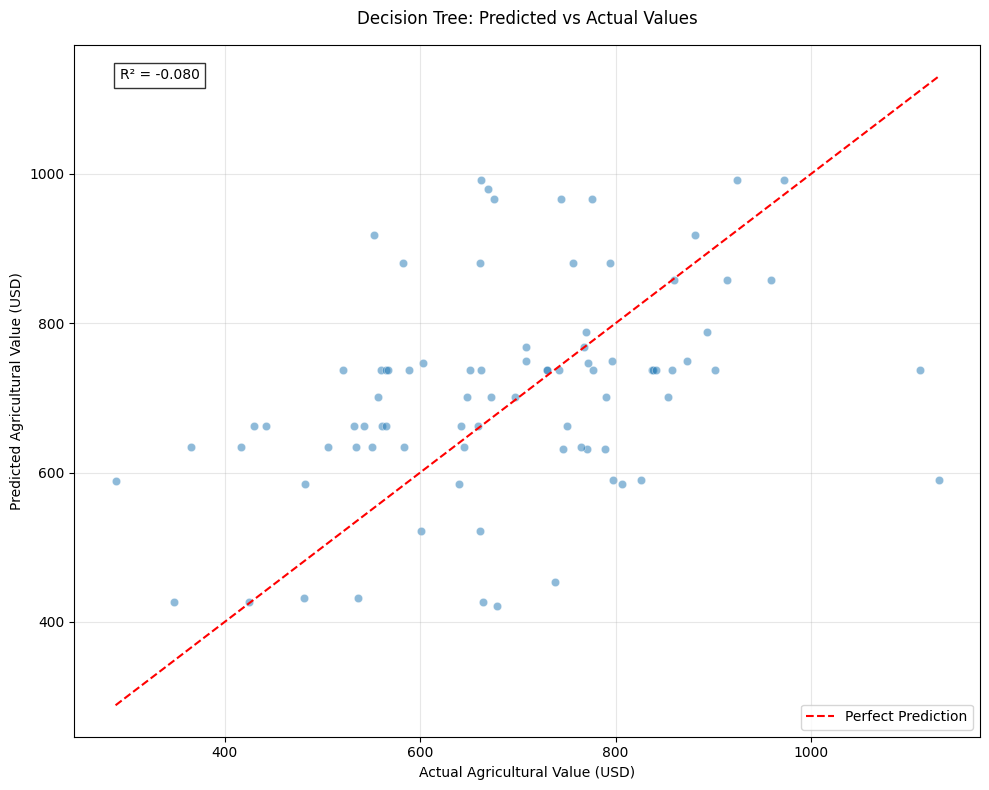


Prediction Statistics:
Mean Actual Value: 688.97
Mean Predicted Value: 708.26
Standard Deviation of Actual Values: 162.52
Standard Deviation of Predictions: 138.87


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=predictions_dt, alpha=0.5)

# Add the perfect prediction line (y=x)
line_coords = [min(Y_test.min(), predictions_dt.min()), max(Y_test.max(), predictions_dt.max())]
plt.plot(line_coords, line_coords, 'r--', label='Perfect Prediction')

# Customize the plot
plt.title('Decision Tree: Predicted vs Actual Values', fontsize=12, pad=15)
plt.xlabel('Actual Agricultural Value (USD)', fontsize=10)
plt.ylabel('Predicted Agricultural Value (USD)', fontsize=10)

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r2_dt:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("\nPrediction Statistics:")
print(f"Mean Actual Value: {Y_test.mean():.2f}")
print(f"Mean Predicted Value: {predictions_dt.mean():.2f}")
print(f"Standard Deviation of Actual Values: {Y_test.std():.2f}")
print(f"Standard Deviation of Predictions: {predictions_dt.std():.2f}")

*DECSION TREE REGRESSOR RESIDUALS*

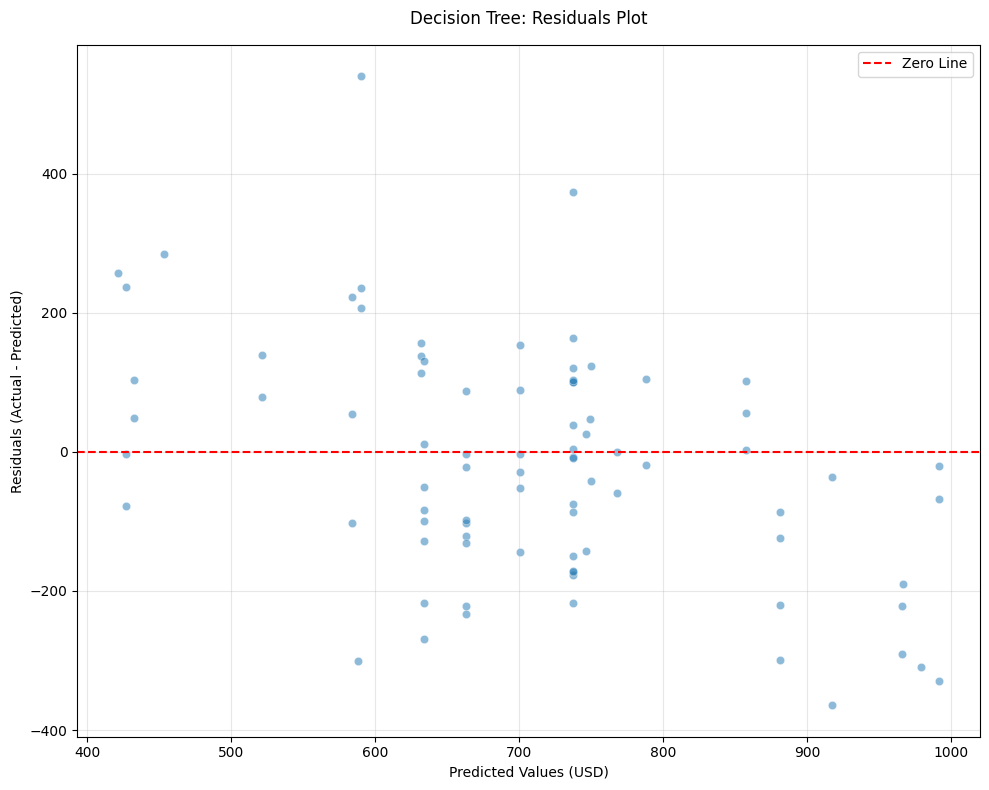


Decision Tree Residuals Statistics:
Mean of Residuals: -19.29
Standard Deviation of Residuals: 166.78
Minimum Residual: -364.40
Maximum Residual: 540.22
Median Residual: -19.26


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals for Decision Tree
residuals_dt = Y_test - predictions_dt

# Create the residuals plot
plt.figure(figsize=(10, 8))

# Scatter plot of predicted values vs residuals
sns.scatterplot(x=predictions_dt, y=residuals_dt, alpha=0.5)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Customize the plot
plt.title('Decision Tree: Residuals Plot', fontsize=12, pad=15)
plt.xlabel('Predicted Values (USD)', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print residual statistics
print("\nDecision Tree Residuals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals_dt):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals_dt):.2f}")
print(f"Minimum Residual: {np.min(residuals_dt):.2f}")
print(f"Maximum Residual: {np.max(residuals_dt):.2f}")
print(f"Median Residual: {np.median(residuals_dt):.2f}")

**NEURAL NETWORK REGRESSOR**

In [46]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the scalable model with Neural Network
nn_model = ScalableModel(model=MLPRegressor(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',             # ReLU activation function
    solver='adam',                # Adam optimizer
    max_iter=1000,               # Maximum iterations
    random_state=42,             # For reproducibility
    learning_rate_init=0.001     # Initial learning rate
), 
    feature_scaler=MinMaxScaler(), 
    target_scaler=MinMaxScaler())

# Train the model with scaled data
nn_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions_nn = nn_model.predict(X_test)

# Evaluate the model
mse_nn = mean_squared_error(Y_test, predictions_nn)
mae_nn = mean_absolute_error(Y_test, predictions_nn)
r2_nn = r2_score(Y_test, predictions_nn)
rmse_nn = np.sqrt(mse_nn)

# Print evaluation metrics
print("Neural Network Model Metrics:")
print(f'MSE: {mse_nn:.3f}')
print(f'MAE: {mae_nn:.3f}')
print(f'R^2: {r2_nn:.3f}')
print(f'RMSE: {rmse_nn:.3f}')



Scaled Predictions Min/Max: 0.23535633786055593, 0.7716313805888702
Inverse Transformed Predictions Min/Max: 551.8128521038957, 1051.4599006109922
Neural Network Model Metrics:
MSE: 19373.318
MAE: 113.122
R^2: 0.258
RMSE: 139.188


*NEURAL NETWORK RANDOM PREDICTIONS*

In [47]:
# Select one random index from the test set
random_index = np.random.choice(len(X_test), 1, replace=False)[0]

# Extract actual feature set and corresponding actual target value
actual_features = X_test.iloc[random_index]
actual_value = Y_test.iloc[random_index]

# Make prediction using the Neural Network model
predicted_value_nn = nn_model.predict(actual_features.values.reshape(1, -1))[0]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Features': [actual_features.values],
    'Predicted Value (Original Scale)': [predicted_value_nn],
    'Actual Value (Original Scale)': [actual_value]
}, index=[random_index])

# Print the comparison
print("\nComparison of Predicted vs. Actual Agricultural Value (Neural Network Model):")
print(comparison_df)

# Print the absolute difference between predicted and actual values
print(f"\nAbsolute Difference: {abs(predicted_value_nn - actual_value):.2f}")

# Print convergence information
print("\nModel Convergence Information:")
print(f"Number of iterations: {nn_model.model.n_iter_}")
print(f"Loss: {nn_model.model.loss_:.6f}")

Scaled Predictions Min/Max: 0.23781049334586718, 0.23781049334586718
Inverse Transformed Predictions Min/Max: 554.0993868987556, 554.0993868987556

Comparison of Predicted vs. Actual Agricultural Value (Neural Network Model):
                                      Actual Features  \
60  [3.0, 4.0, 0.0, 0.0, 0.006329114, 0.006329114,...   

    Predicted Value (Original Scale)  Actual Value (Original Scale)  
60                        554.099387                     416.274775  

Absolute Difference: 137.82

Model Convergence Information:
Number of iterations: 54
Loss: 0.011056


c:\Users\LPT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


*NEURAL NETWORK REGRESSOR: PREDICTED vs ACTUAL*

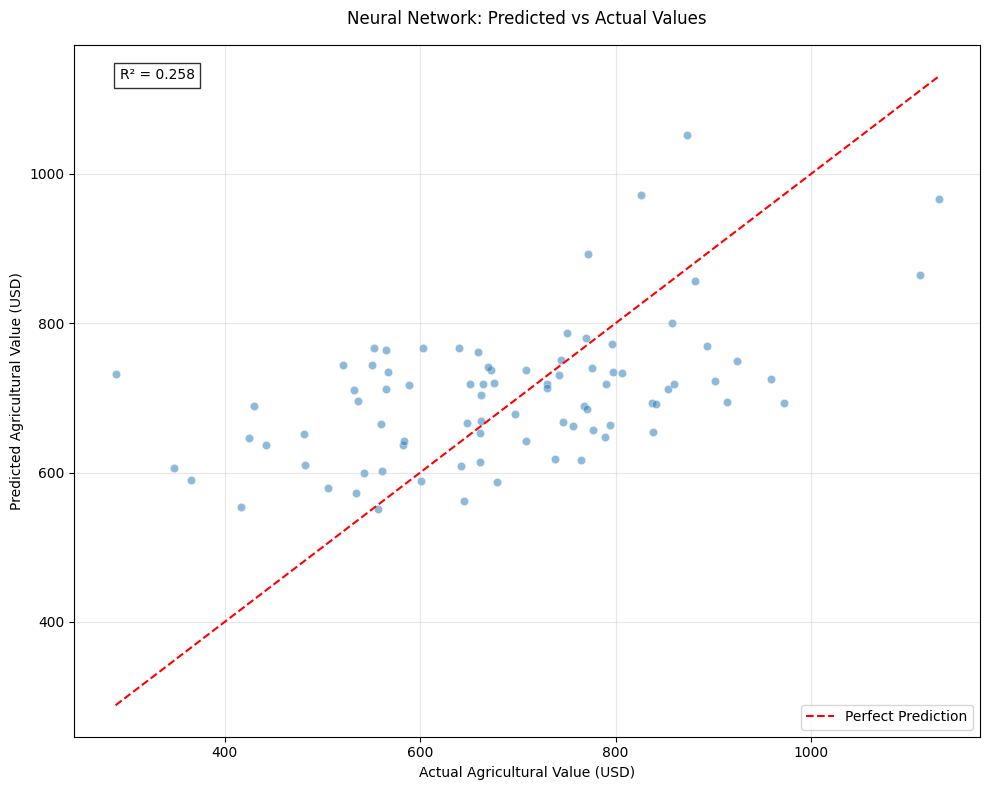


Prediction Statistics:
Mean Actual Value: 688.97
Mean Predicted Value: 703.64
Standard Deviation of Actual Values: 162.52
Standard Deviation of Predictions: 89.25


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test, y=predictions_nn, alpha=0.5)

# Add the perfect prediction line (y=x)
line_coords = [min(Y_test.min(), predictions_nn.min()), max(Y_test.max(), predictions_nn.max())]
plt.plot(line_coords, line_coords, 'r--', label='Perfect Prediction')

# Customize the plot
plt.title('Neural Network: Predicted vs Actual Values', fontsize=12, pad=15)
plt.xlabel('Actual Agricultural Value (USD)', fontsize=10)
plt.ylabel('Predicted Agricultural Value (USD)', fontsize=10)

# Add R² value to the plot
plt.text(0.05, 0.95, f'R² = {r2_nn:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print additional statistics
print("\nPrediction Statistics:")
print(f"Mean Actual Value: {Y_test.mean():.2f}")
print(f"Mean Predicted Value: {predictions_nn.mean():.2f}")
print(f"Standard Deviation of Actual Values: {Y_test.std():.2f}")
print(f"Standard Deviation of Predictions: {predictions_nn.std():.2f}")

*NEURAL NETWORK REGRESSOR: RESIDUAL PLOT*

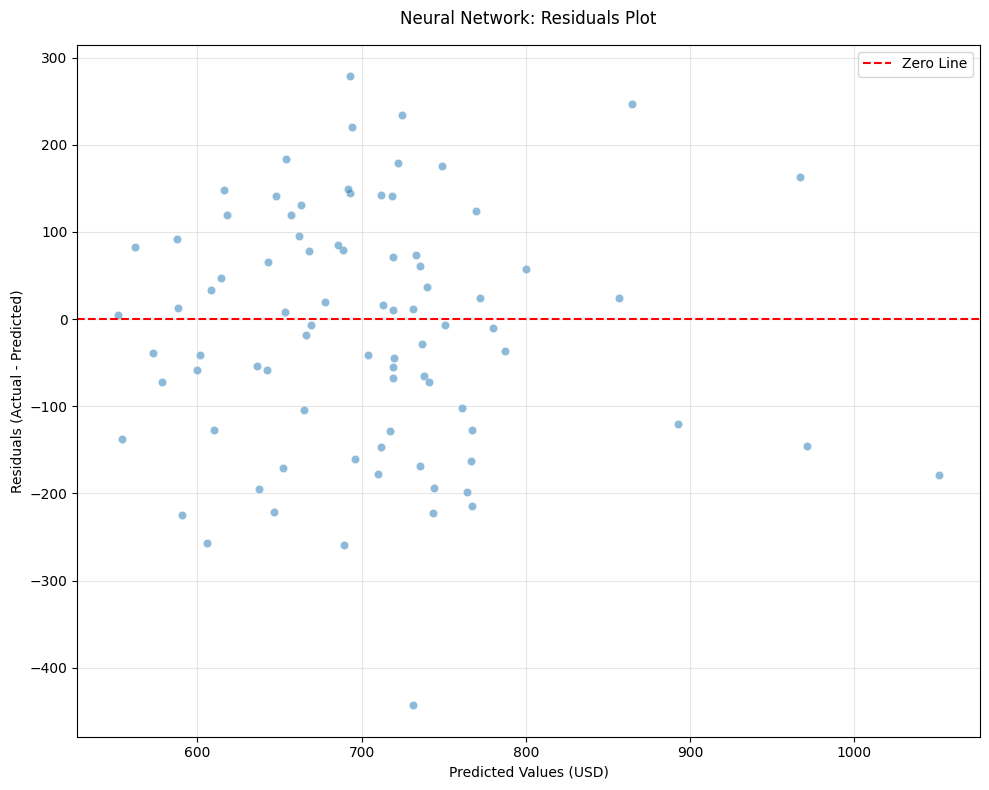


Neural Network Residuals Statistics:
Mean of Residuals: -14.66
Standard Deviation of Residuals: 138.41
Minimum Residual: -443.12
Maximum Residual: 278.68
Median Residual: -6.93


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals for Neural Network
residuals_nn = Y_test - predictions_nn

# Create the residuals plot
plt.figure(figsize=(10, 8))

# Scatter plot of predicted values vs residuals
sns.scatterplot(x=predictions_nn, y=residuals_nn, alpha=0.5)

# Add horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Customize the plot
plt.title('Neural Network: Residuals Plot', fontsize=12, pad=15)
plt.xlabel('Predicted Values (USD)', fontsize=10)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()

# Print residual statistics
print("\nNeural Network Residuals Statistics:")
print(f"Mean of Residuals: {np.mean(residuals_nn):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals_nn):.2f}")
print(f"Minimum Residual: {np.min(residuals_nn):.2f}")
print(f"Maximum Residual: {np.max(residuals_nn):.2f}")
print(f"Median Residual: {np.median(residuals_nn):.2f}")